# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [943]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering



In [944]:
# Ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

In [945]:
# Import dataset
data = pd.read_csv('Wholesale_Data.csv')
data = data.copy()
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [946]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [947]:
# Display summary statistics
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [948]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [949]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [950]:
# Check missing value
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [951]:
# Check 0 values
(data ==0).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Data Visualization

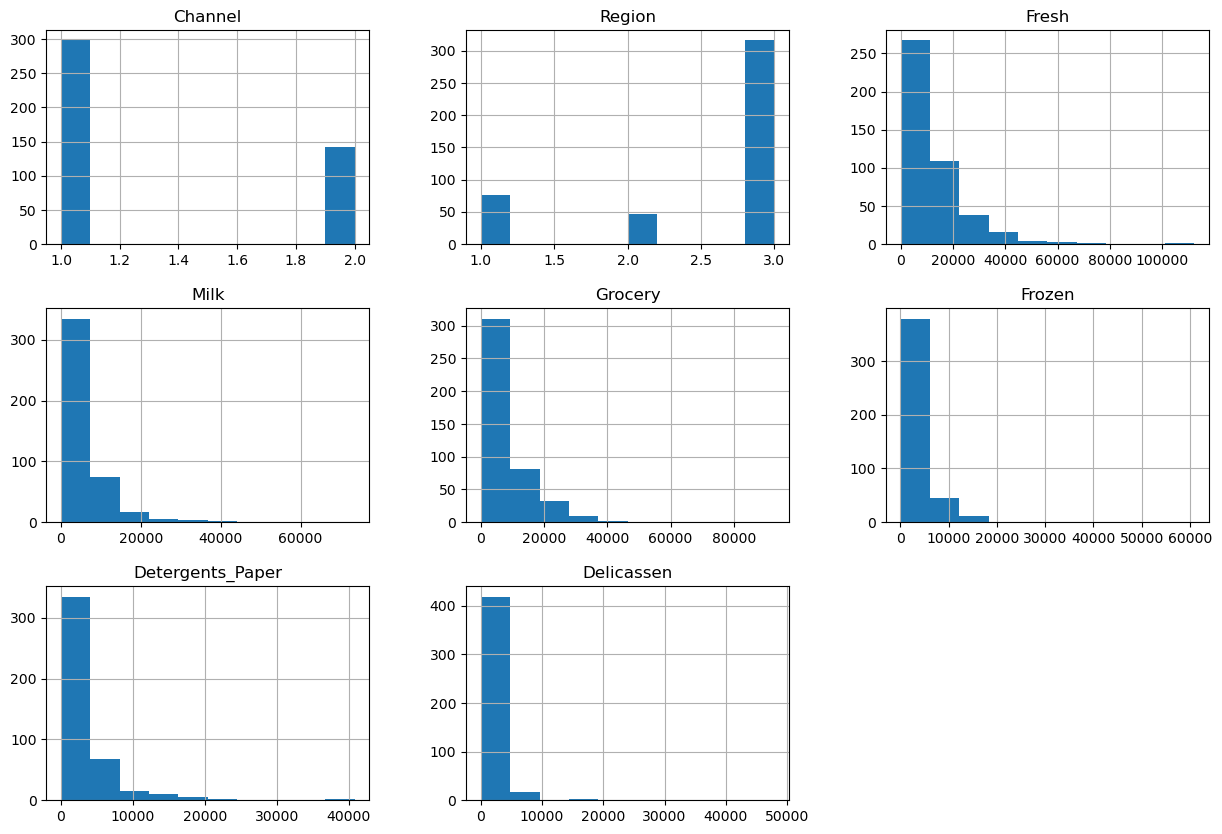

In [952]:
# Histogram
data.hist(figsize=(15, 10))
plt.show()

The count of customers per each channel type: 
 Channel
1    298
2    142
Name: count, dtype: int64

The percentage of customers per each channel type: 
 Channel
1    67.727273
2    32.272727
Name: proportion, dtype: float64

The count of customers per each region: 
 Region
3    316
1     77
2     47
Name: count, dtype: int64

The percentage of customers per each region: 
 Region
3    71.818182
1    17.500000
2    10.681818
Name: proportion, dtype: float64


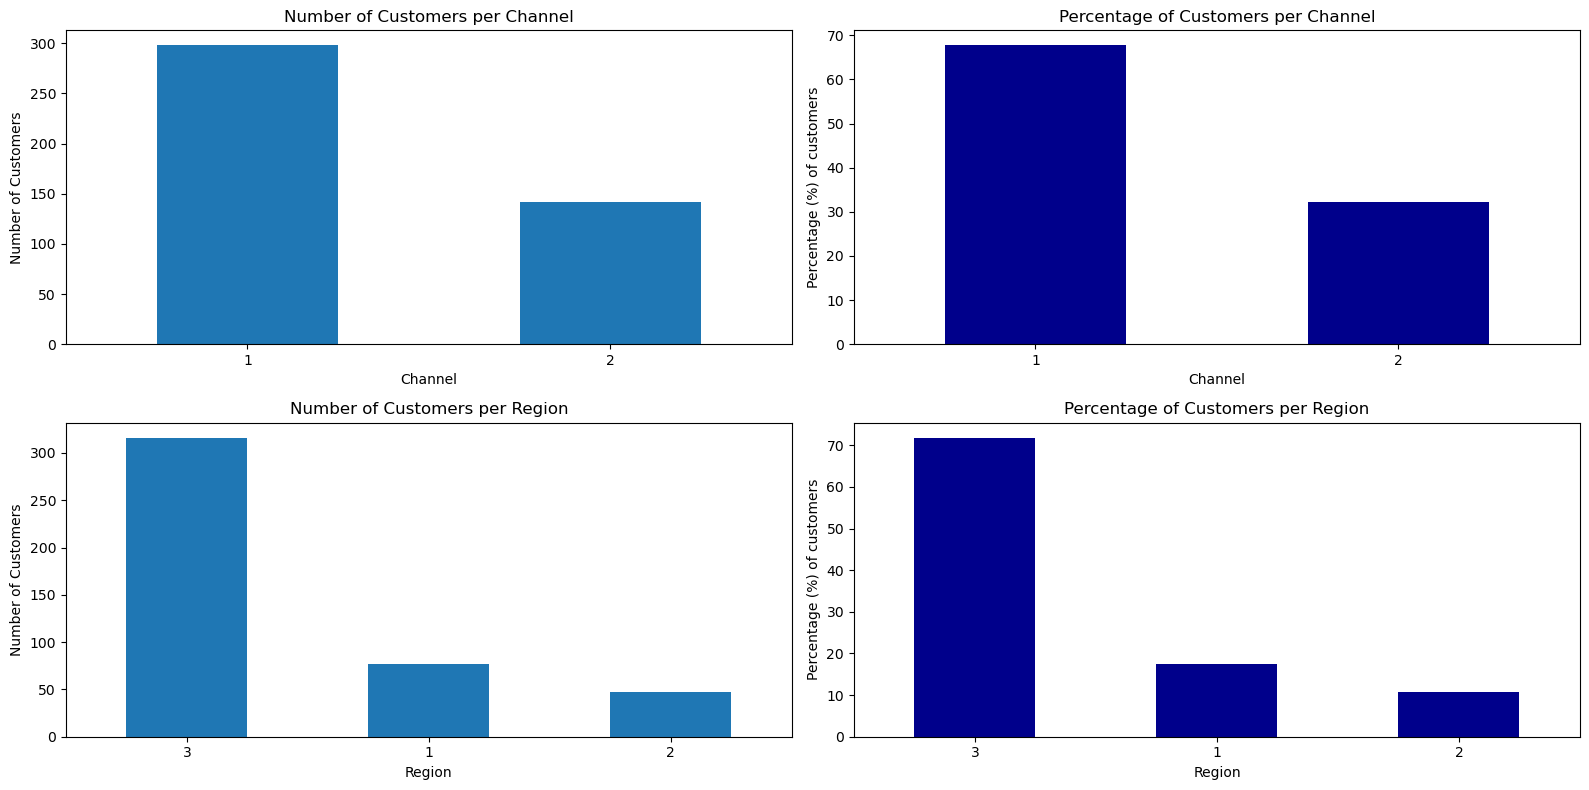

In [953]:
# Calculate actual numbers of customers per each channel type
channel_counts = data['Channel'].value_counts().sort_values(ascending=False)
print('The count of customers per each channel type: \n', channel_counts)

# Calculate percentages of customers per each channel type
channel_perc = data['Channel'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each channel type: \n', channel_perc)

# For the 'Region' column
# Calculate actual numbers of customers per each region
region_counts = data['Region'].value_counts().sort_values(ascending=False)
print('\nThe count of customers per each region: \n', region_counts)

# Calculate percentages of customers per each region
region_perc = data['Region'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each region: \n', region_perc)

# Plotting
plt.figure(figsize=(16, 8))

# Plot for 'Channel'
plt.subplot(2, 2, 1)
channel_counts.plot(kind='bar')
plt.title('Number of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.subplot(2, 2, 2)
channel_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=0)

# Plot for 'Region'
plt.subplot(2, 2, 3)
region_counts.plot(kind='bar')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
region_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

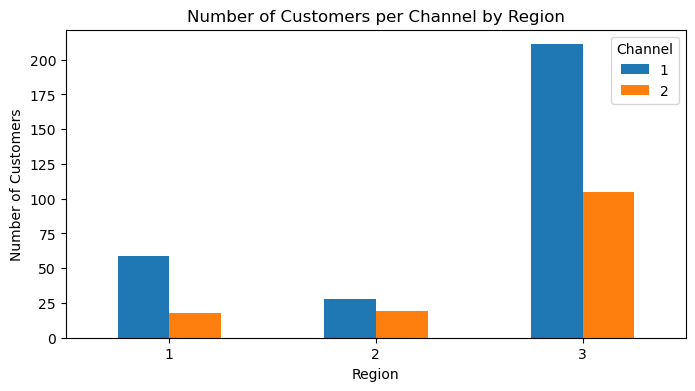

In [954]:
# Group by 'Channel' and 'Region' and count the number of customers
channel_region_counts = data.groupby(['Channel', 'Region']).size().unstack()

# Plot the counts of customers per 'Channel' by 'Region'
channel_region_counts.T.plot(kind='bar', figsize=(8, 4))
plt.title('Number of Customers per Channel by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Channel')
plt.show()

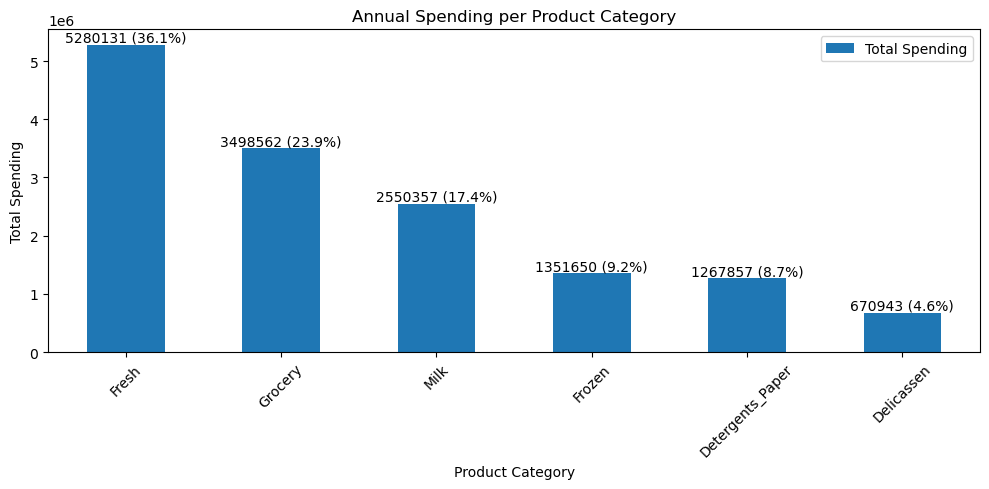

In [955]:
# Calculate the sum of annual spending per each product category
category_sums = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum().sort_values(ascending=False)

# Calculate the percentage of each category with respect to the total spending
category_perc = (category_sums / category_sums.sum()) * 100

# Plot the sum of annual spending per each product category
plt.figure(figsize=(10, 5))
ax = category_sums.plot(kind='bar', label='Total Spending')
plt.title('Annual Spending per Product Category')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')
plt.xticks(rotation=45)

# Add text labels for both percentage and number on the bars
for i, v in enumerate(category_sums):
    ax.text(i, v + 10, f'{v:.0f} ({category_perc[i]:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.legend()
plt.show()

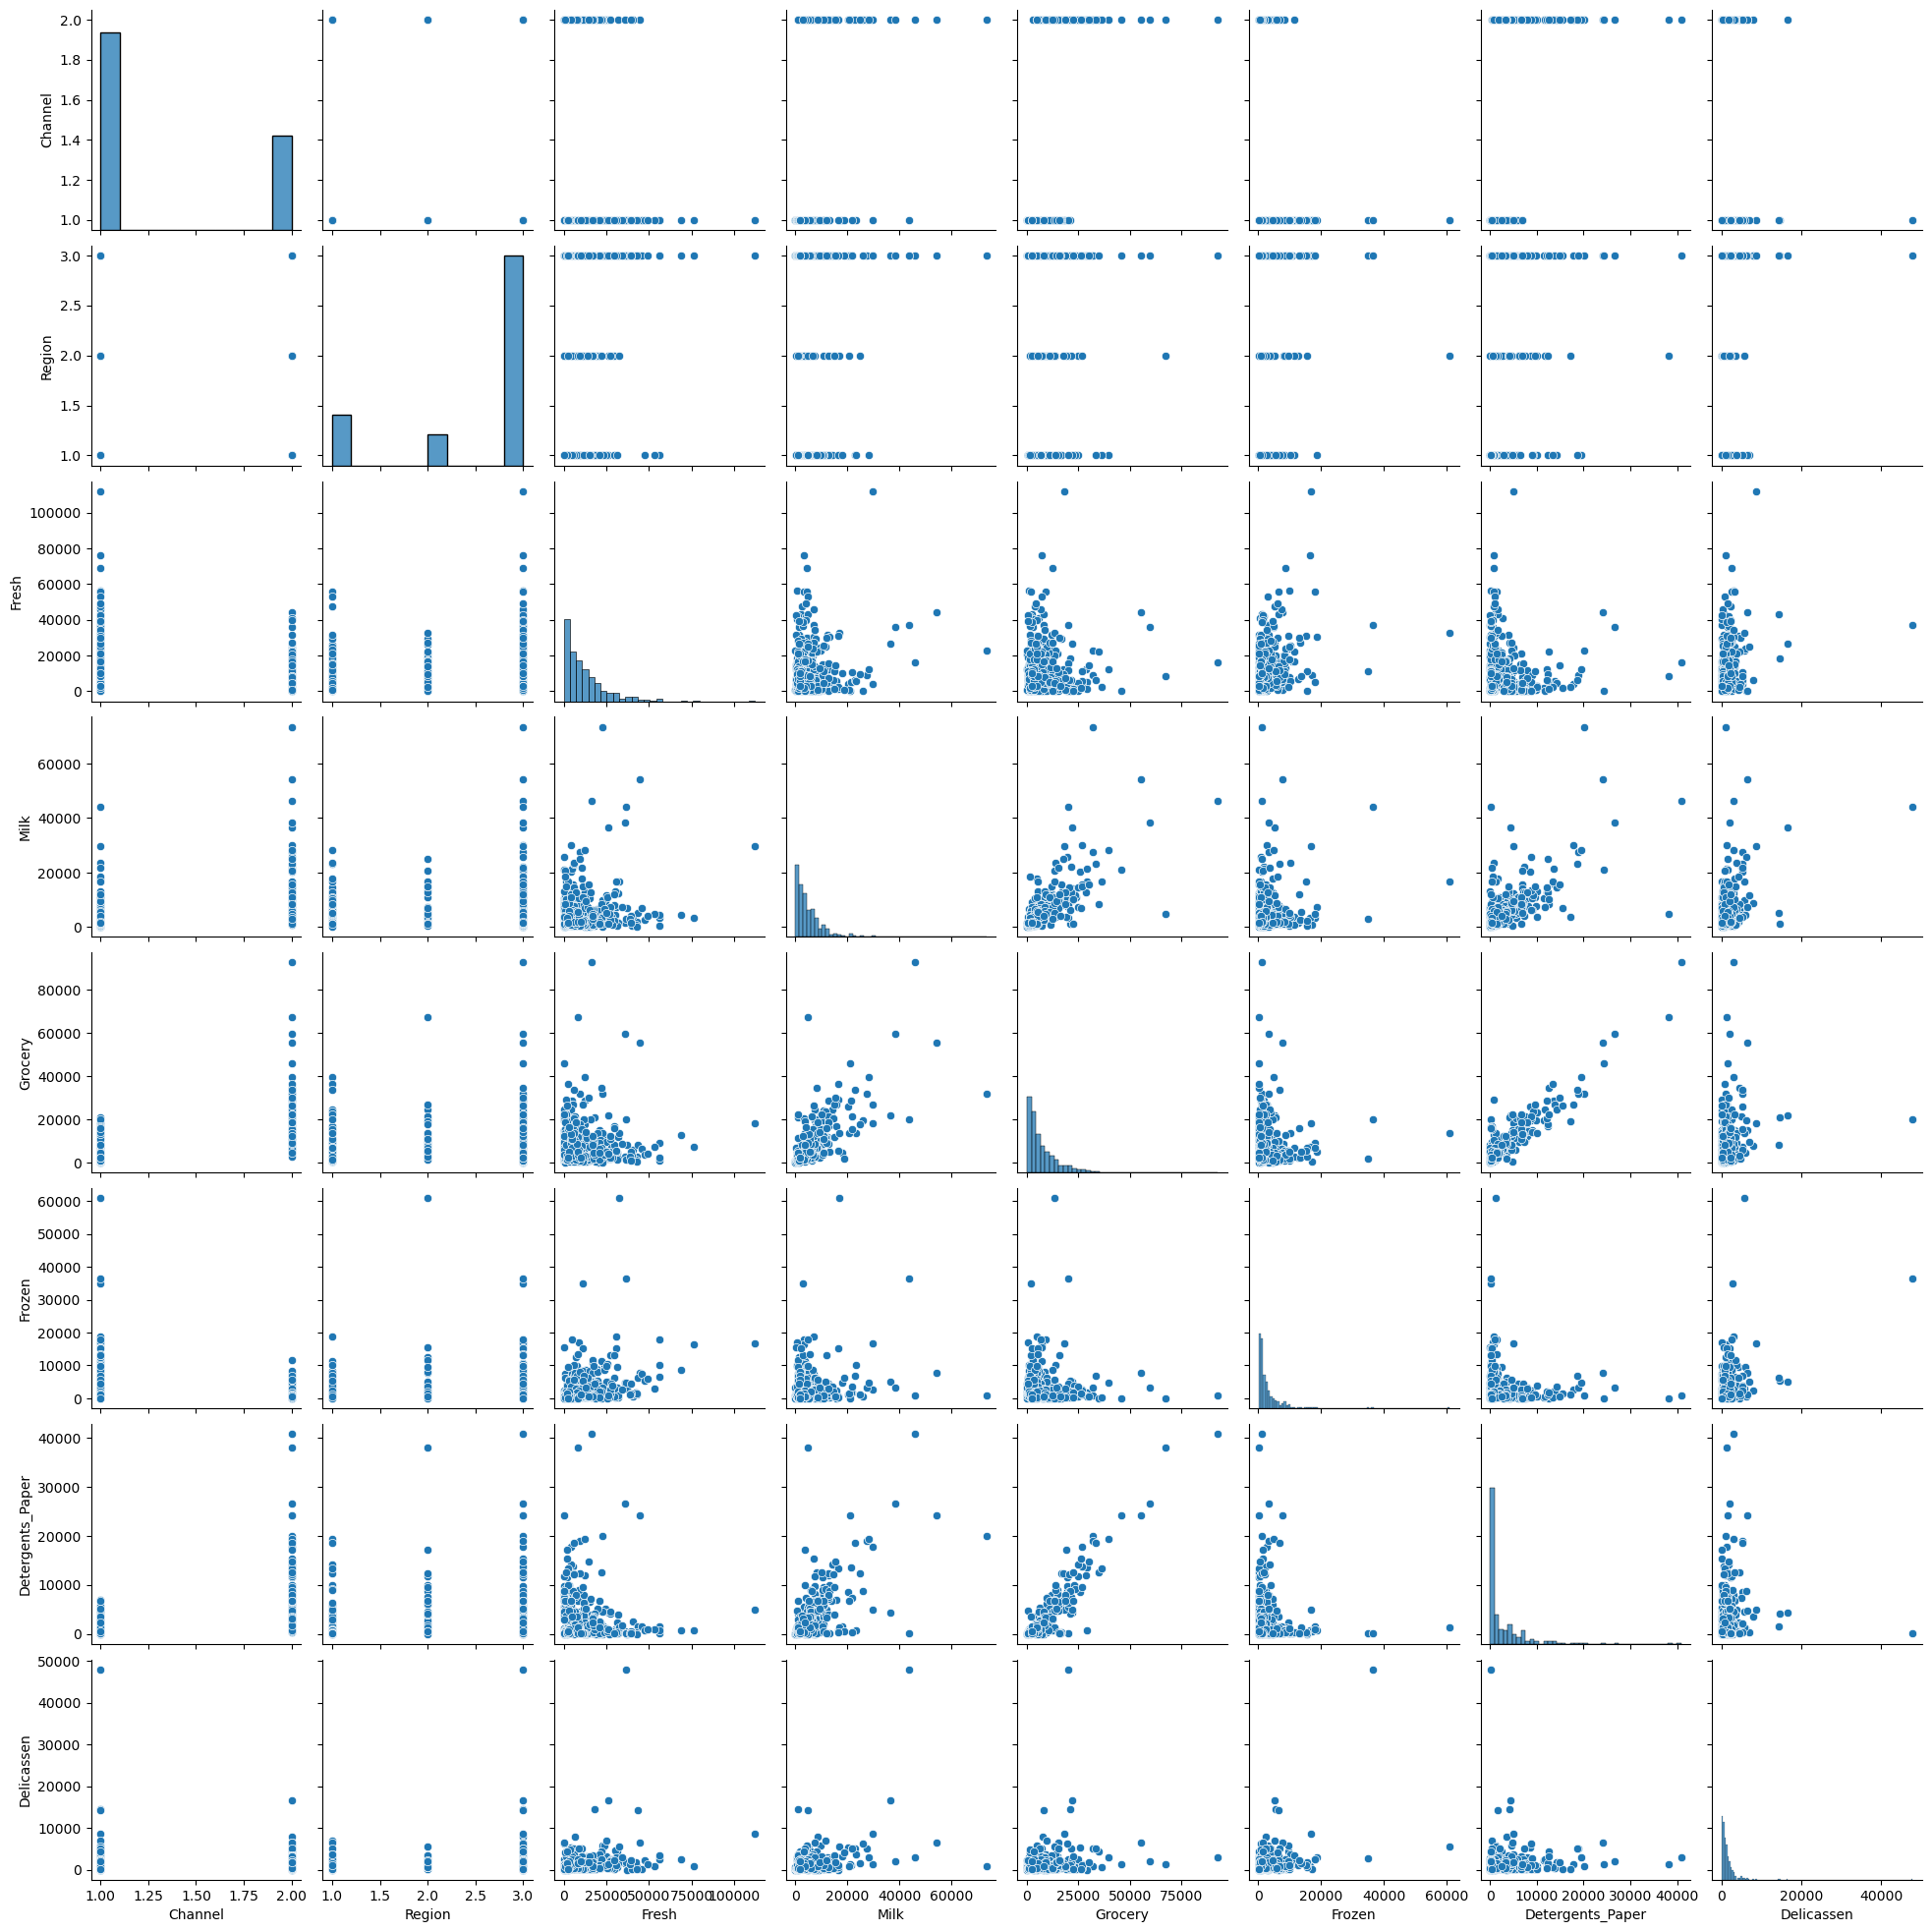

In [956]:
# Use pairplot check visualize pairwise relationships and distributions in a dataset
sns.pairplot(data)
plt.show()

Outlier Detection:

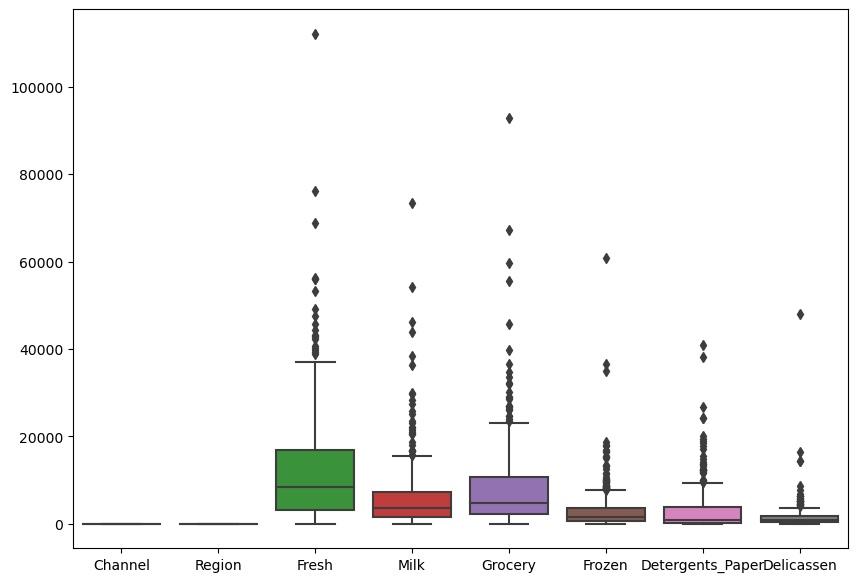

In [957]:
# Using boxplot to visualize outliers
plt.figure(figsize=(10,7))
sns.boxplot(data=data)
plt.show()

In [958]:
# From the Pairplot and boxplot visualization above, remove the outliers
# Remove outlier at Delicassen > 12500
data = data[data['Delicassen'] <= 12500]

# Remove outlier at Detergents_Paper > 35000
data = data[data['Detergents_Paper'] < 35000]

# Remove outlier at Frozen > 30000
data = data[data['Frozen'] < 30000]

# Remove outlier at Grocery > 50000
data = data[data['Grocery'] < 50000]

# Remove outlier at Milk > 45000
data = data[data['Milk'] < 45000]

# Remove outlier at Fresh > 60000
data = data[data['Fresh'] < 60000]

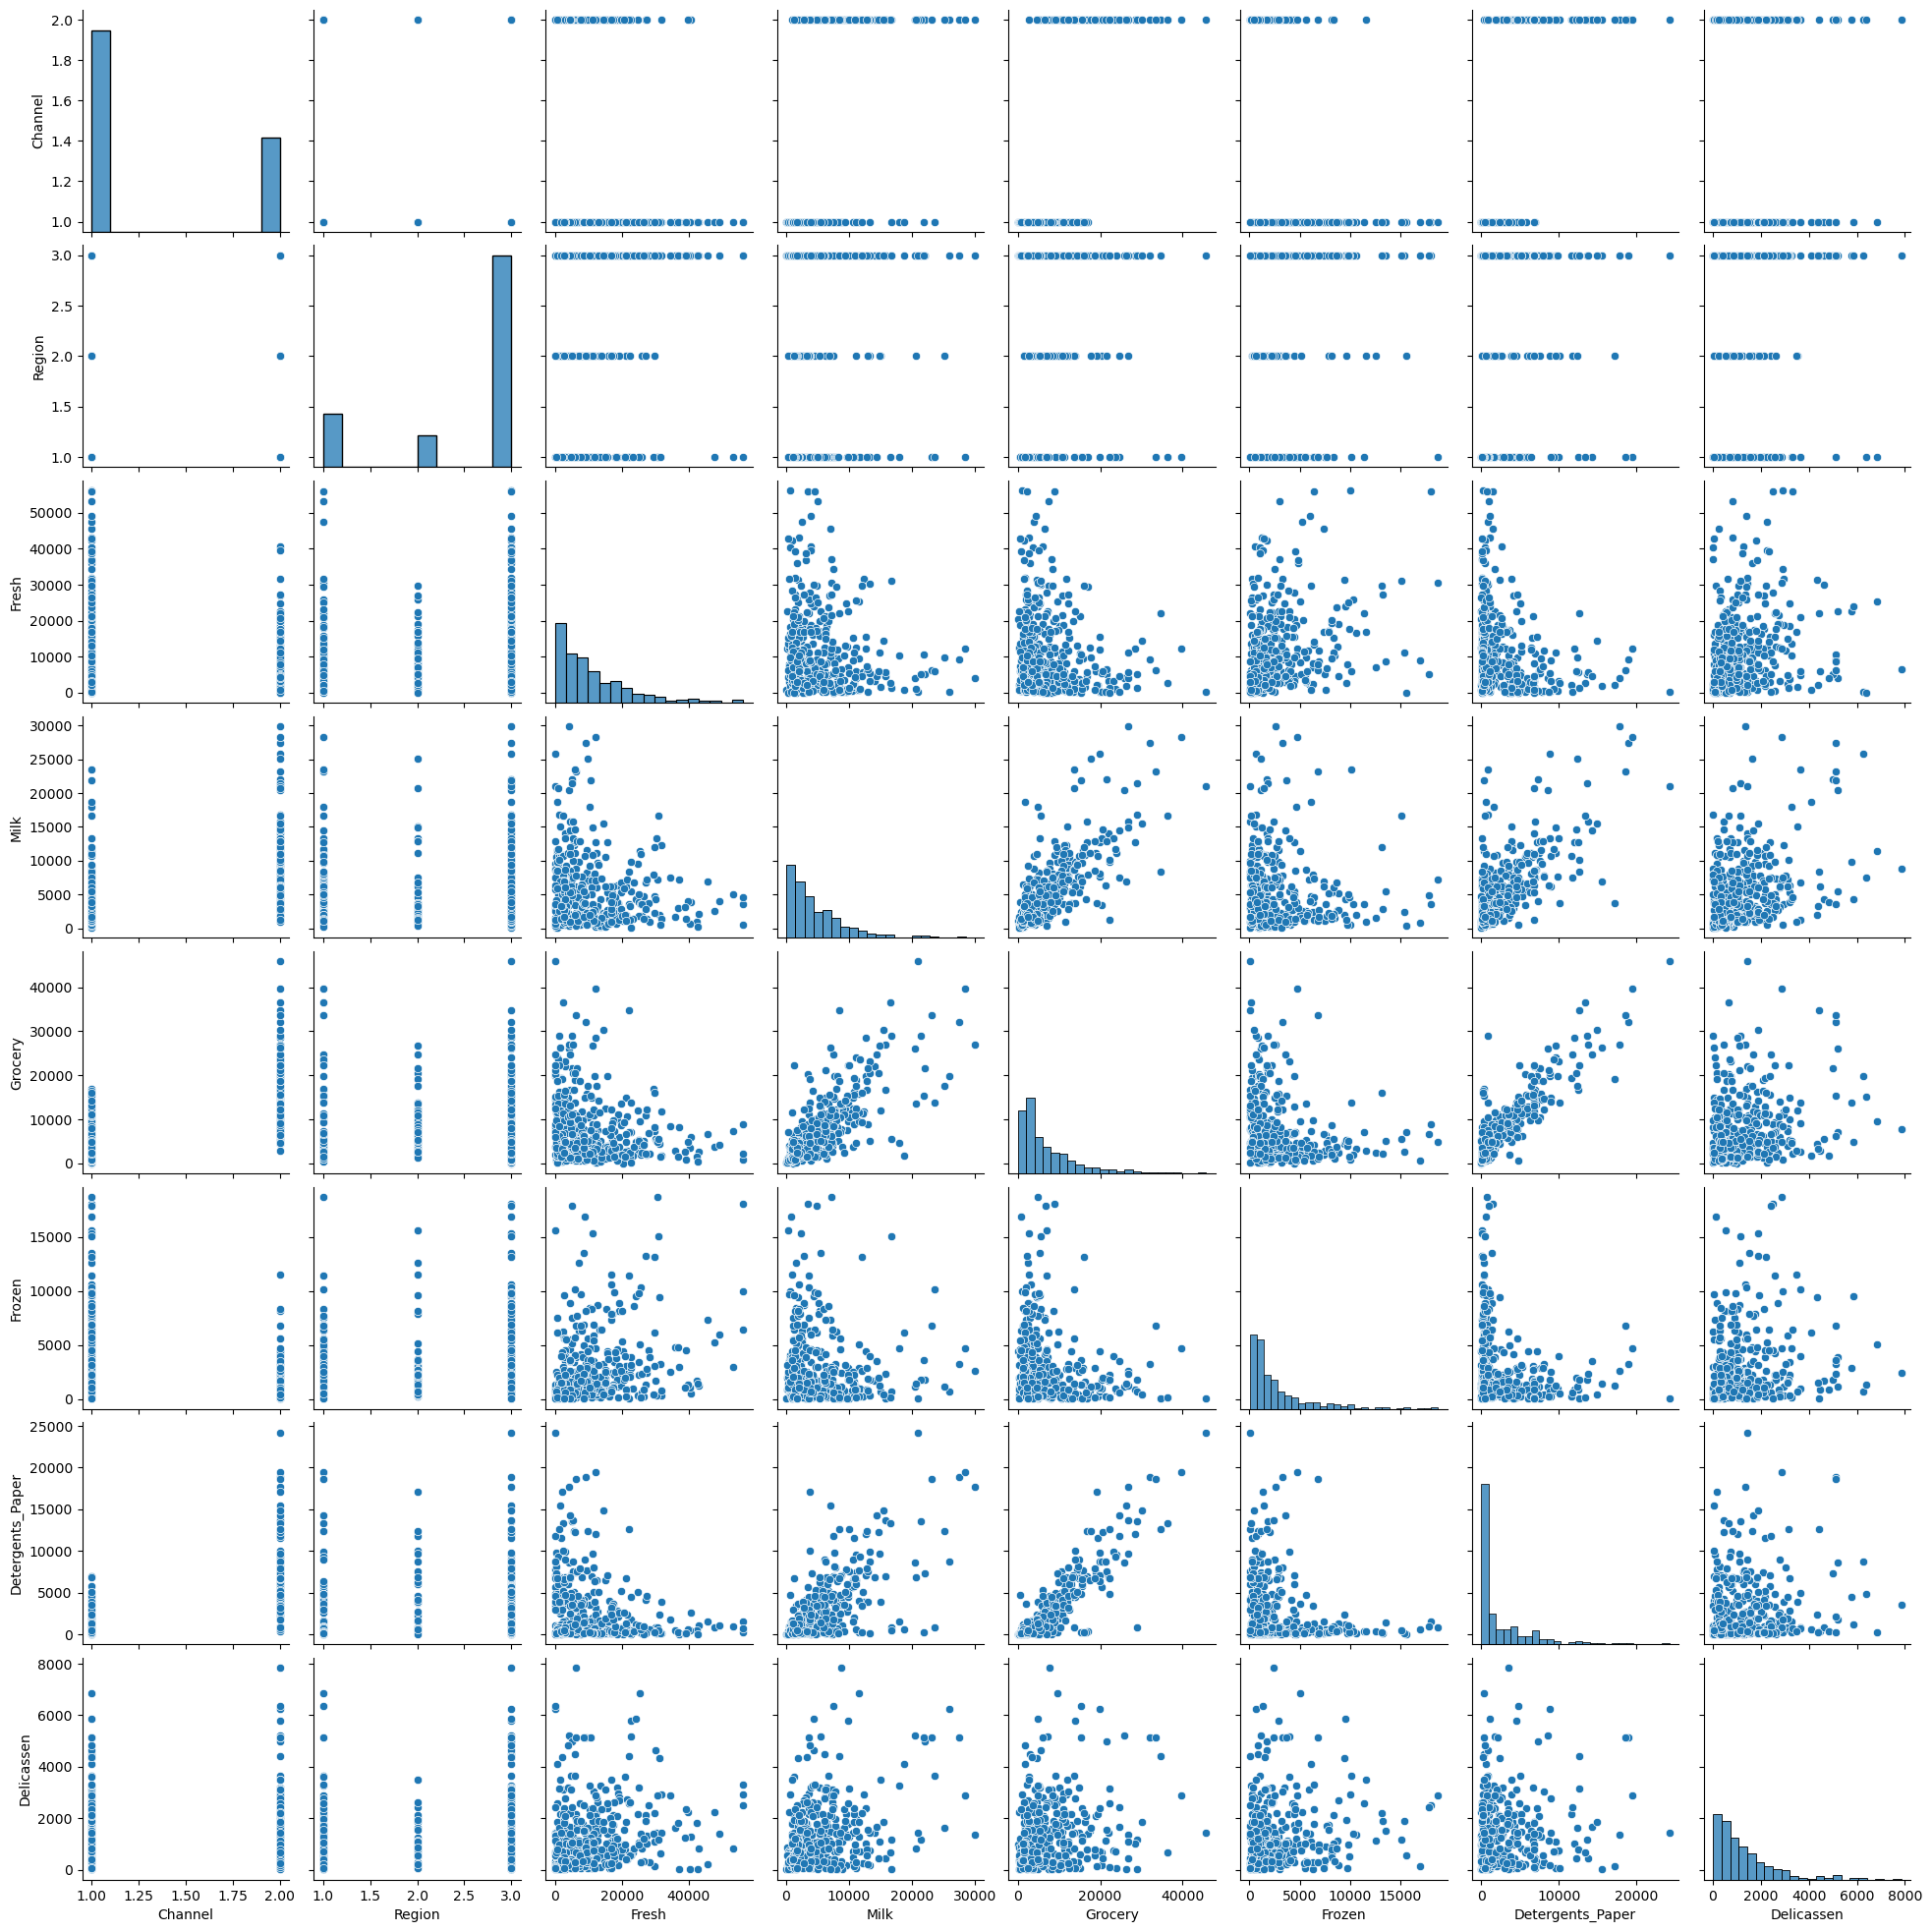

In [959]:
# Check visualize pairwise relationships and distributions in a dataset again
sns.pairplot(data)
plt.show()

In [960]:
# We don't use Channel and Region for EDA because both are categorical variables
df = data.drop(columns=['Channel', 'Region'])

Compute and visualize the correlation coefficients

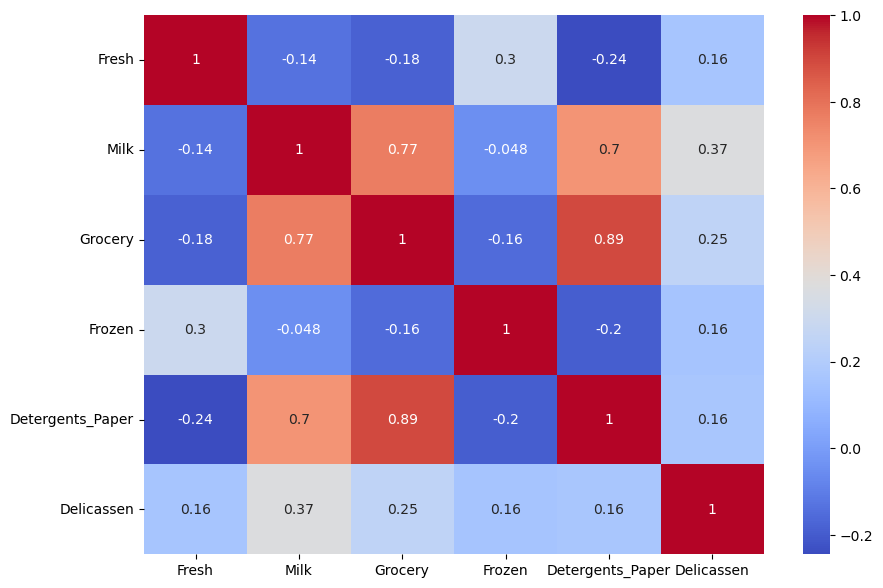

In [961]:
# Correlation analysis
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

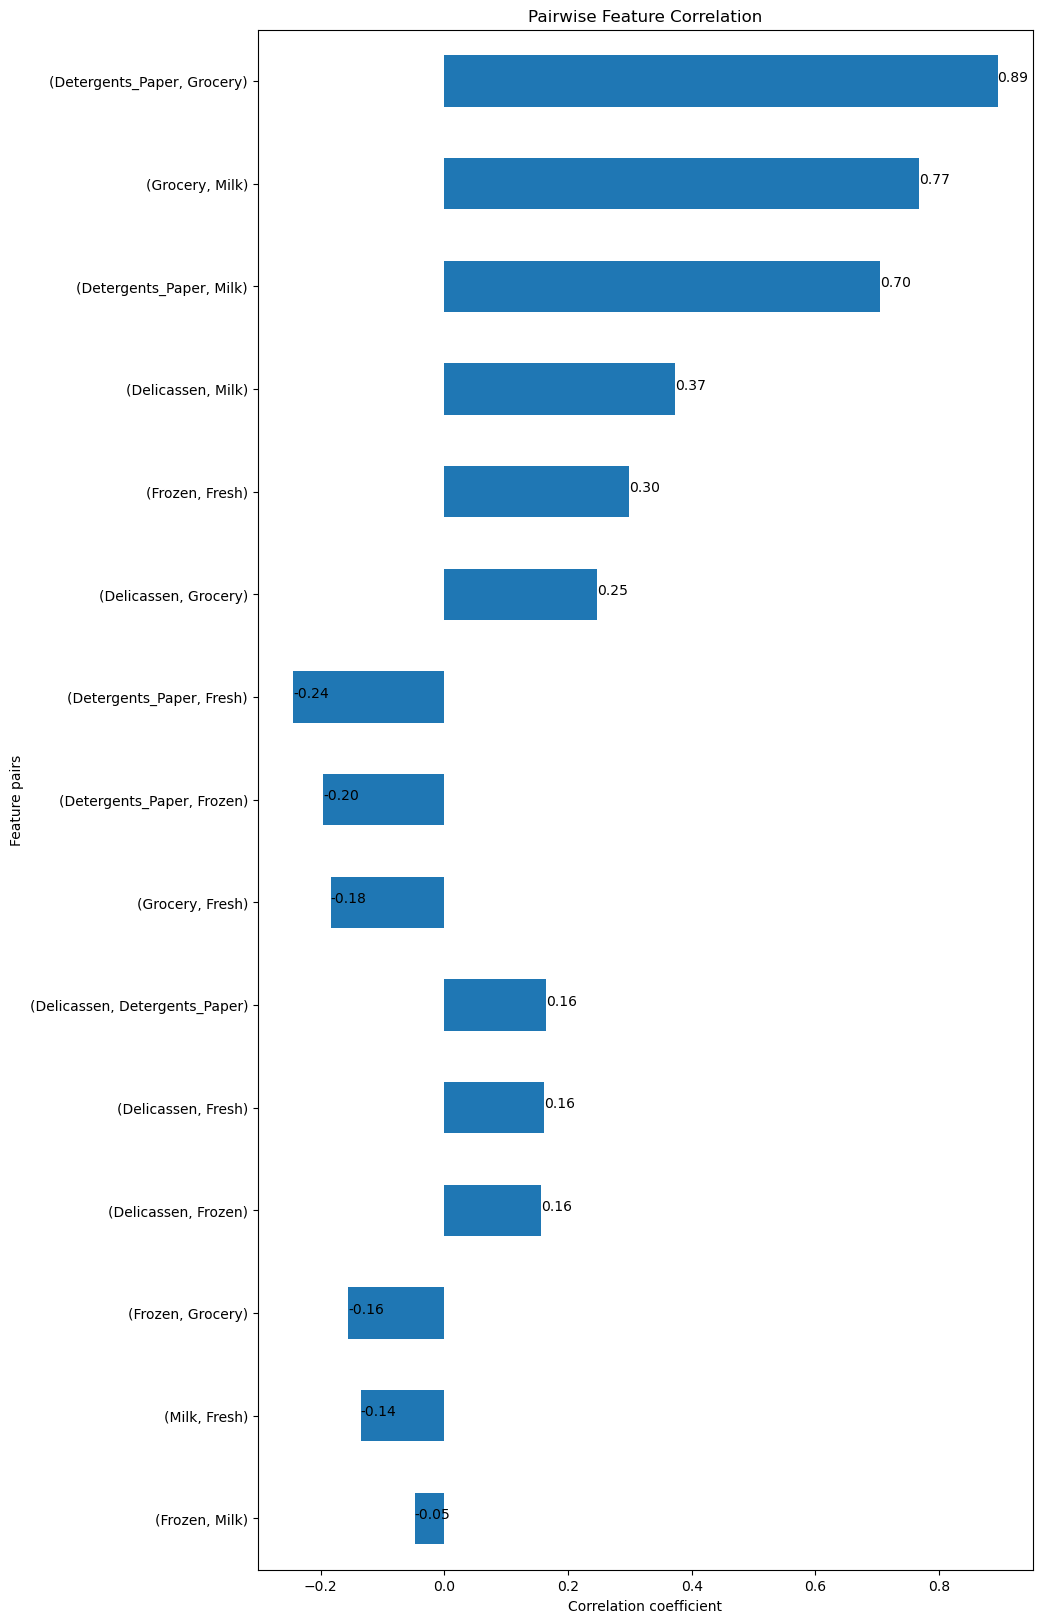

In [962]:
# Visualize the correlation between each pair of features
# Extract upper triangle of the correlation matrix without the diagonal
upper_triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# Flatten to get a series of correlation values
correlations = upper_triangle.stack()

# Sort by absolute value
sorted_correlations = correlations.reorder_levels([1,0]).sort_values(key=lambda x: np.abs(x), ascending=True)

# Plot
plt.figure(figsize=(10, 20))
ax = sorted_correlations.plot(kind='barh')
plt.title('Pairwise Feature Correlation')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature pairs')

# Annotate each bar with its value
for index, value in enumerate(sorted_correlations):
    ax.text(value, index, f'{value:.2f}')

plt.show()

The significant correlation observations:

- Detergents_Paper and Grocery: The correlation is 0.89, indicating a strong positive correlation between 'Detergents_Paper' and 'Grocery'.
- Grocery and Milk: A correlation of 0.77 suggests a strong positive correlation between 'Grocery' and 'Milk'.
- Detergents_Paper and Milk: A correlation of 0.70 indicates a strong positive correlation between 'Detergents_Paper' and 'Milk'.
- Frozen and Grocery: The correlation is -0.16, indicating a negative relationship between 'Frozen' and 'Grocery'.
- Milk and Fresh: With a correlation of -0.14, there is a negative relationship between 'Milk' and 'Fresh'.
- Frozen and Milk: The correlation is -0.05, indicating a negative relationship between 'Frozen' and 'Milk'.



Identify the most important features by PCA before tranform

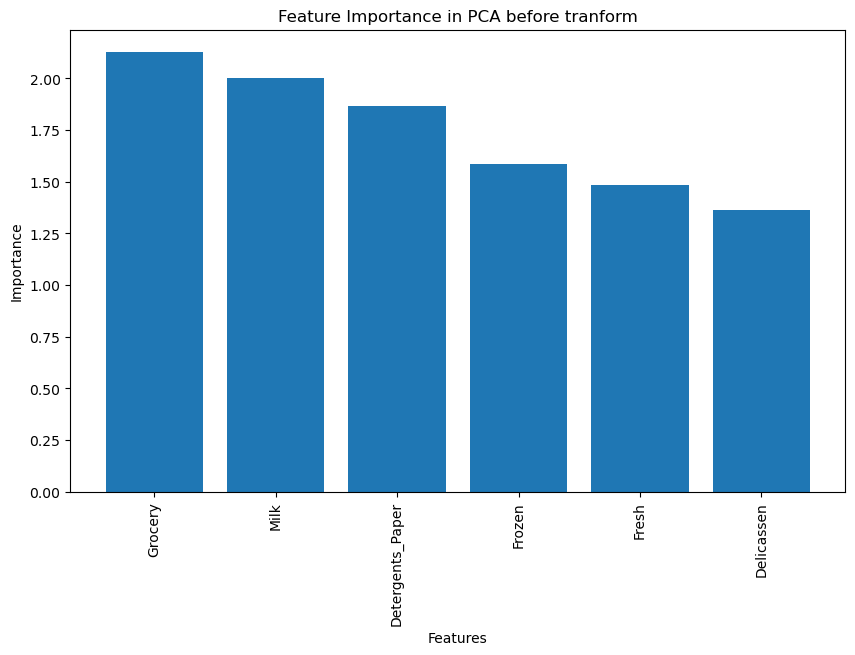

In [963]:
# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# Retrieve Component Loadings
component_loadings = pca.components_

#Determine Feature Importance
feature_importance = np.abs(component_loadings).sum(axis=0)

#Rank Features
feature_ranking = np.argsort(feature_importance)[::-1]

#Visualize Feature Importance:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[feature_ranking])
plt.xticks(range(len(feature_importance)), df.columns[feature_ranking], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in PCA before tranform')
plt.show()

From the provided bar graph:
- Grocery: Approximately 2.1
- Milk: Slightly below 2.0
- Detergents_Paper: Close to 1.85
- Frozen: Slightly above 1.6
- Fresh: Slightly below 1.45
- Delicassen: A little above 1.4

The differences in feature importances are relatively small, suggesting that each feature contributes meaningfully to the dataset. Therefore, retaining all the features would indeed be a good choice

Data Transformation

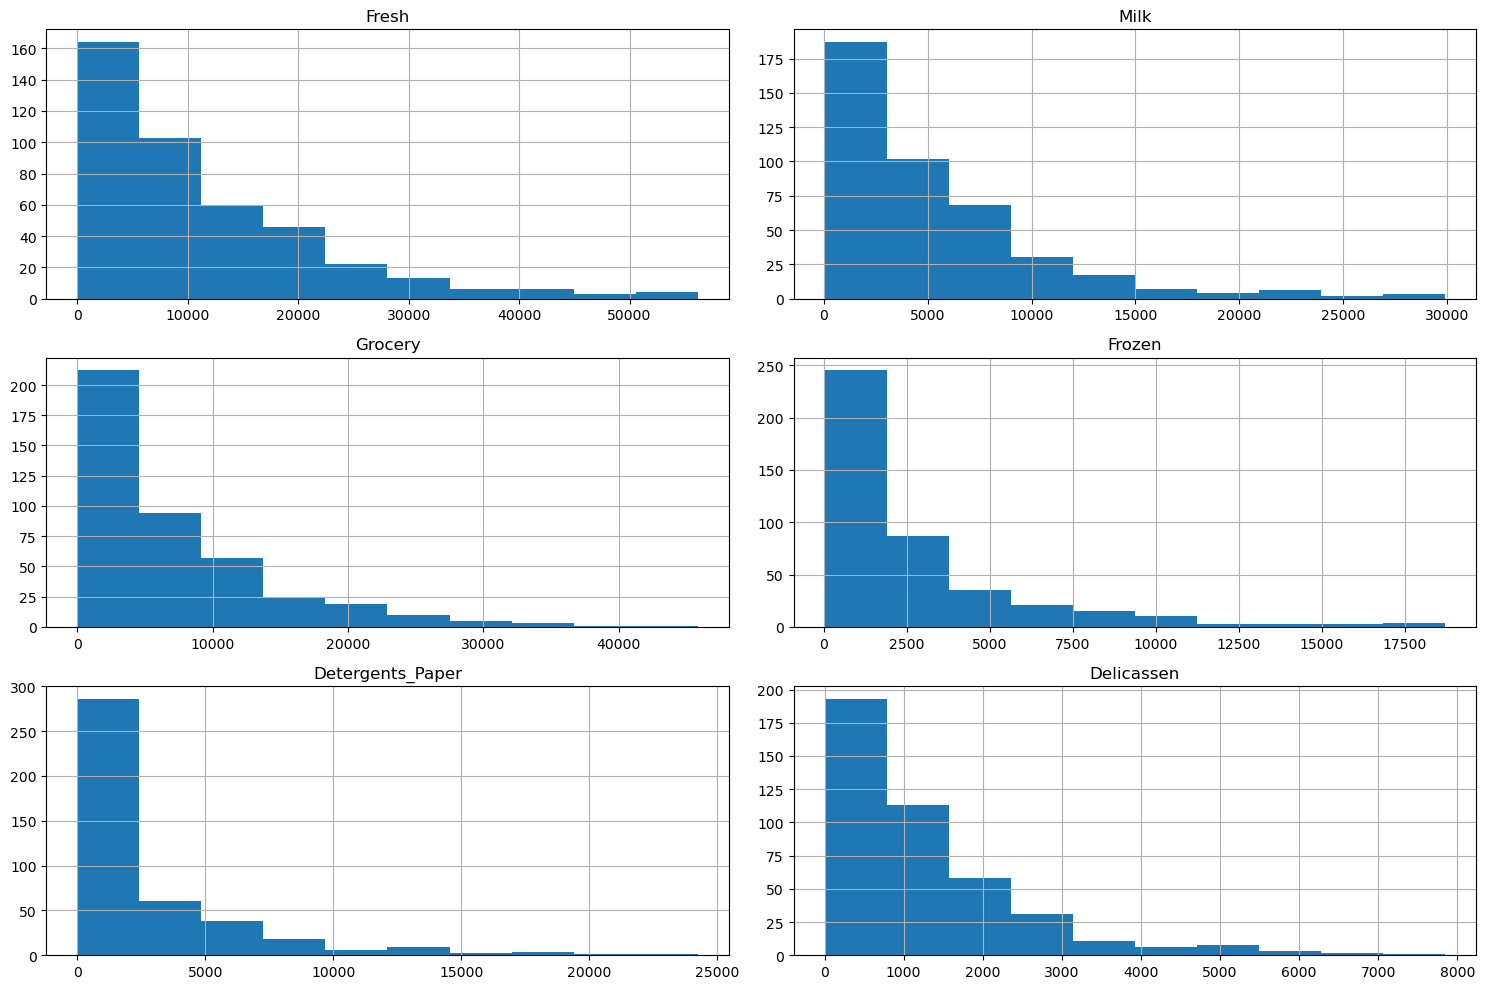

In [964]:
# Use histogram to check skew data after remove outlier
df.hist(figsize=(15, 10))
plt.tight_layout() 
plt.show()

Interpreting Histograms: Our data is Right-skewed (or positively skewed): Most of the data is concentrated on the left side with a tail extending to the right.

In [965]:
# Make a copy of the DataFrame
df_transformed = df.copy()

# Log Transformation
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

df_transformed[continuous_features] = np.log1p(df_transformed[continuous_features])

# Use the RobustScaler to make the data more robust against outliers
scaler = RobustScaler()
df_robust_scaled = scaler.fit_transform(df_transformed)

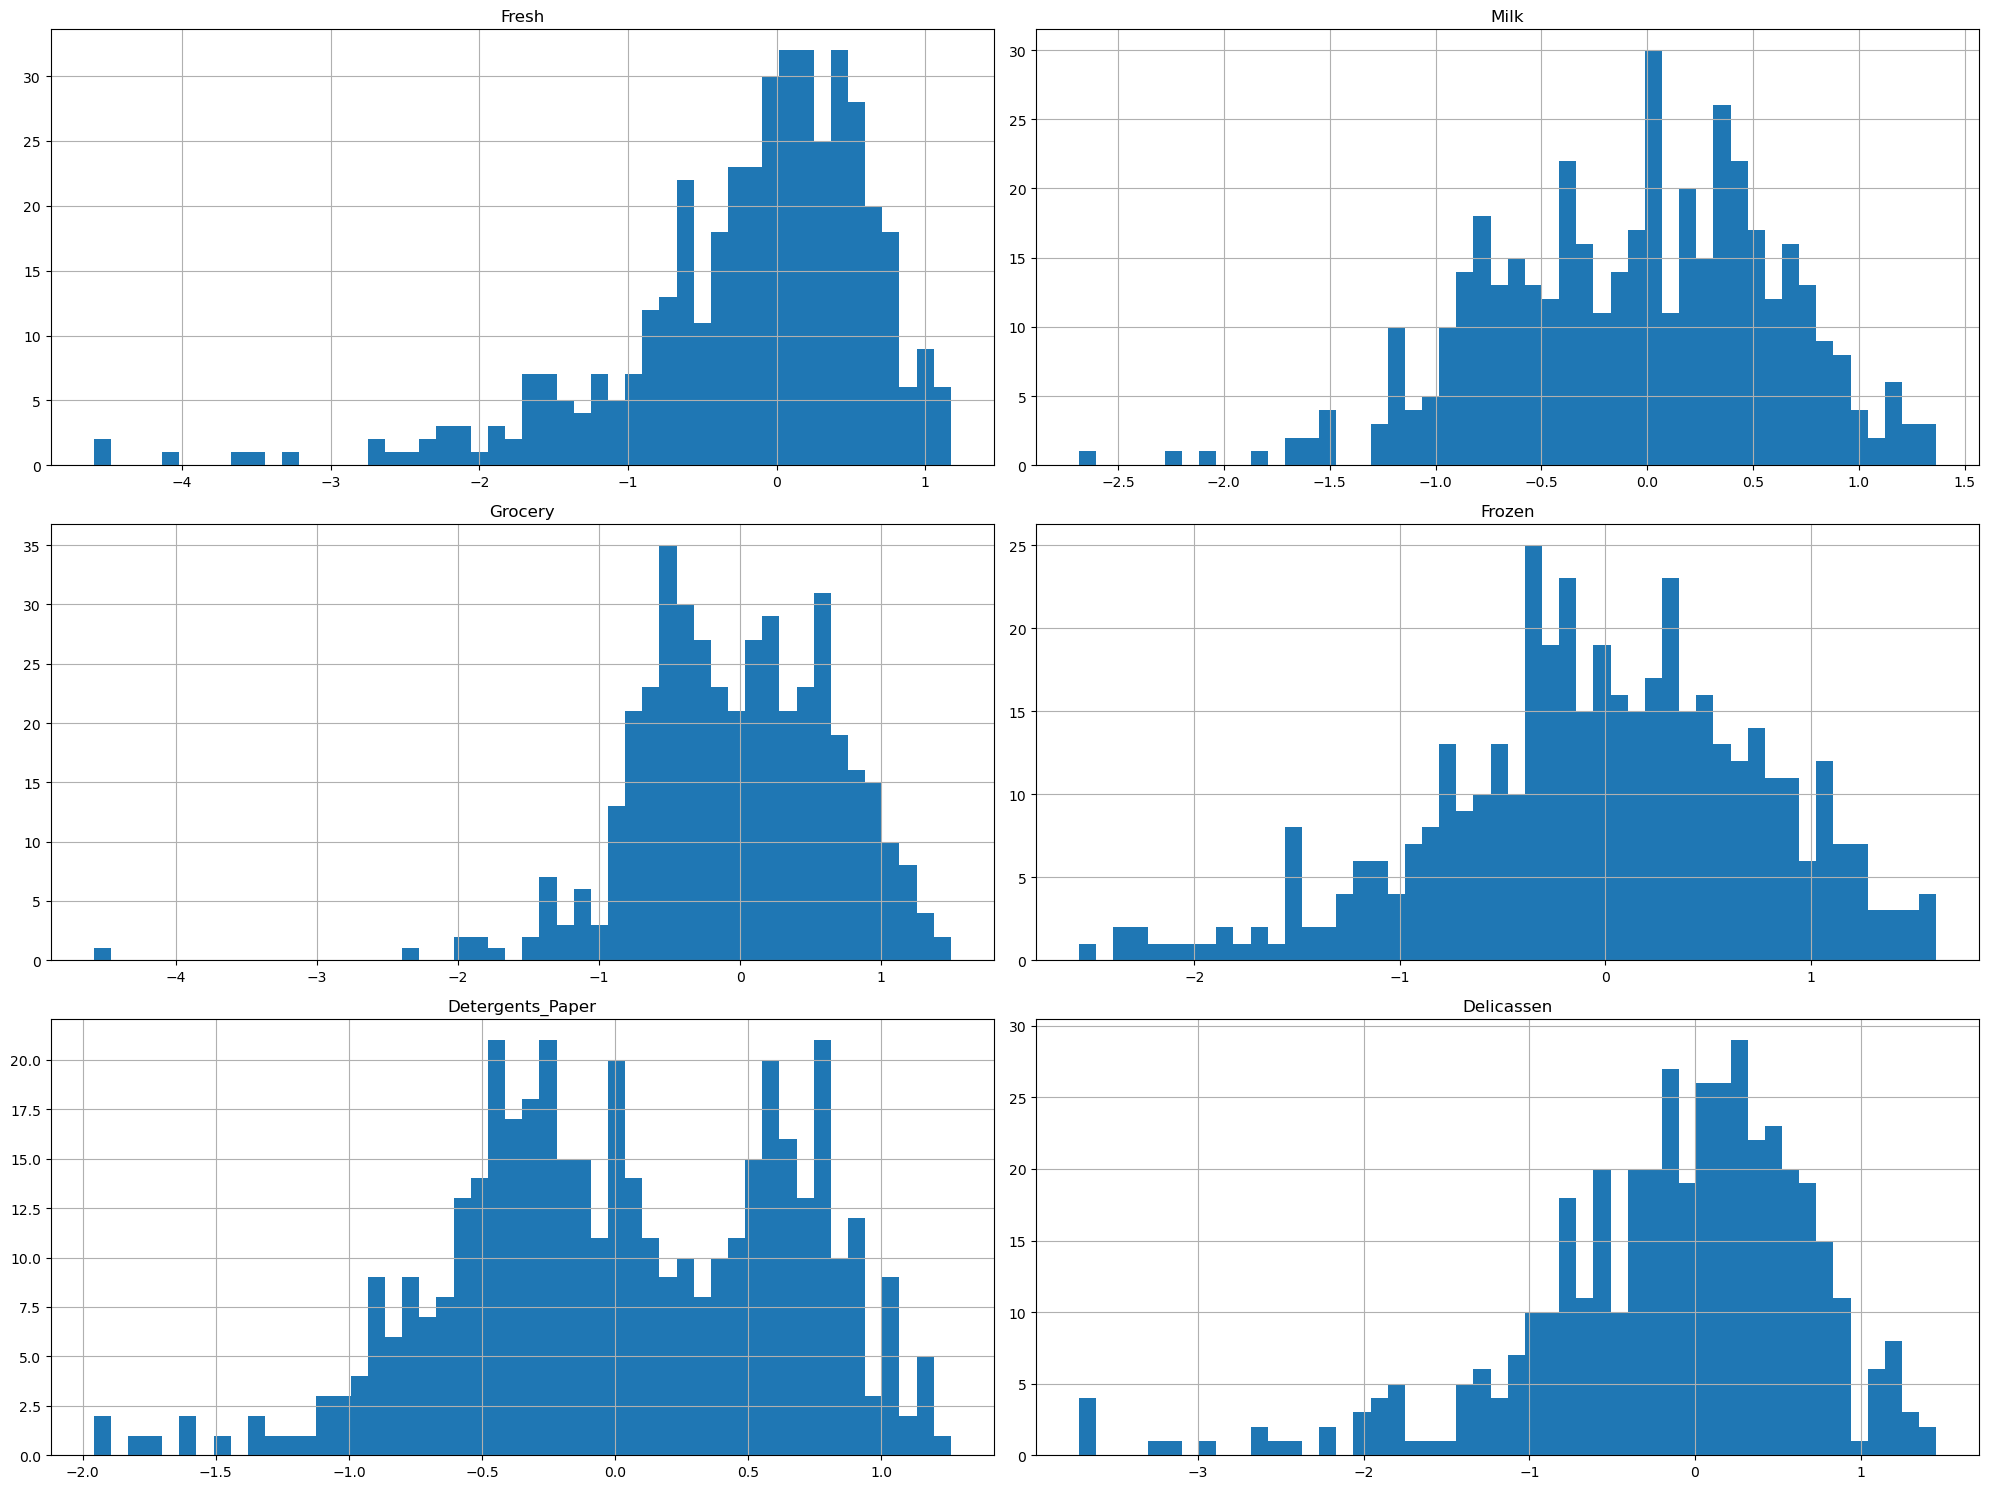

In [966]:
# Plot histograms for all features
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=df.columns)  # Convert the scaled array back to a DataFrame
df_robust_scaled.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [967]:
df_robust_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.272724,0.636718,0.322690,-1.221586,0.446085,0.250320
1,-0.080619,0.646918,0.475768,0.113152,0.523042,0.443534
2,-0.144078,0.577462,0.333182,0.310399,0.547260,1.457346
3,0.300485,-0.709373,-0.056327,0.931491,-0.168091,0.448129
4,0.622652,0.263263,0.290699,0.619390,0.295072,1.174757


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

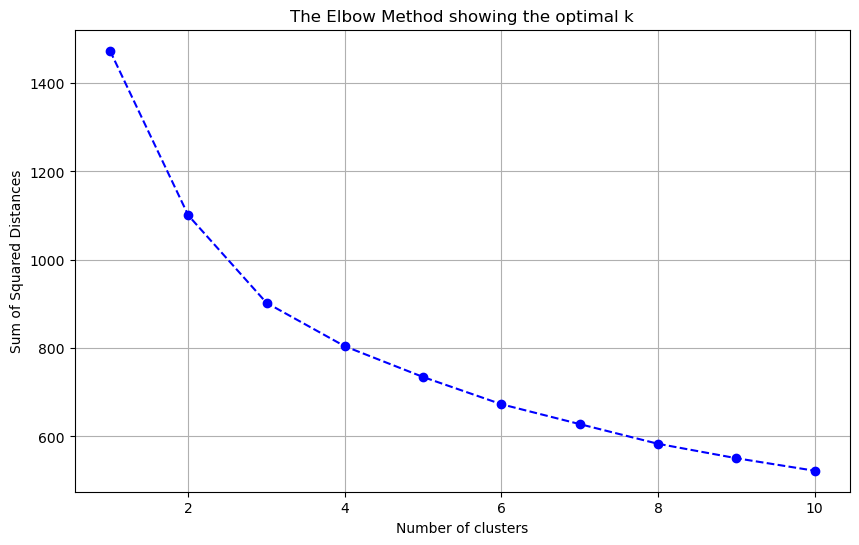

In [968]:
# Compute sum of squared distances for different k
ssd = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_robust_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

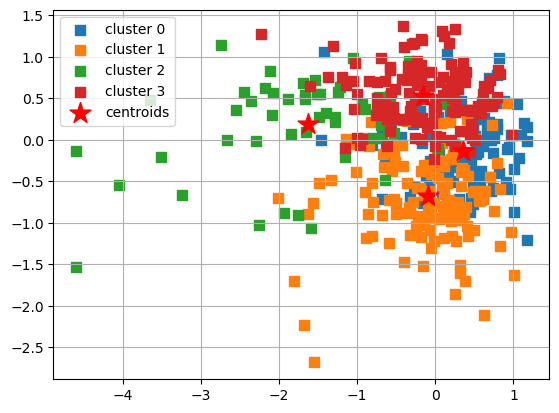

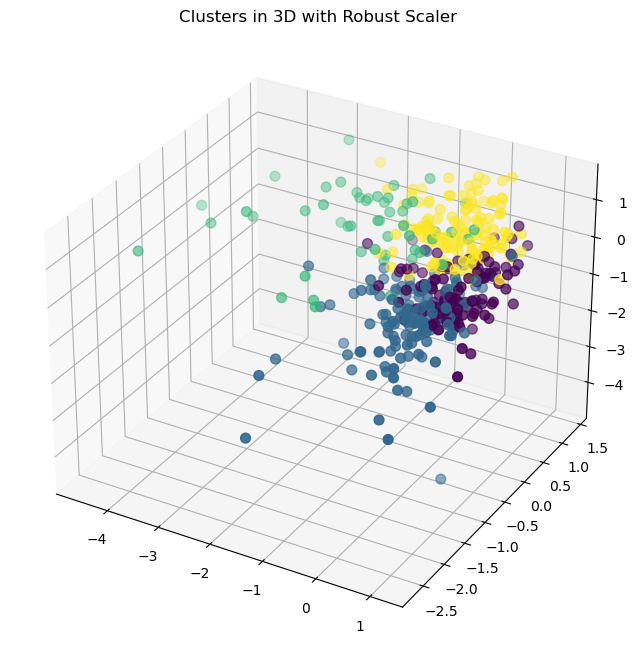

Inertia: 804.1765715611344


In [969]:
# Based on the Elbow Method graph above, the optimal value of k (number of clusters) appears to be around 4
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km = kmeans.fit_predict(df_robust_scaled)

def plot_clusters(X, y_res, plt_cluster_centers=False):
    # Convert DataFrame to numpy array if it's not
    if isinstance(X, pd.DataFrame):
        X = X.values

    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

# Now call the function
plot_clusters(df_robust_scaled, y_km, plt_cluster_centers=True)

# Plotting (Using the 3D plot as example)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Convert the DataFrame to numpy array before indexing
data_array = df_robust_scaled.values
ax.scatter(data_array[:, 0], data_array[:, 1], data_array[:, 2], c=y_km, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with Robust Scaler")
plt.show()

# To print inertia:
print("Inertia:", kmeans.inertia_)

From the plot, the The clusters are somewhat overlapping. Try to change the scaling to use StandardScaler without Log Transformation

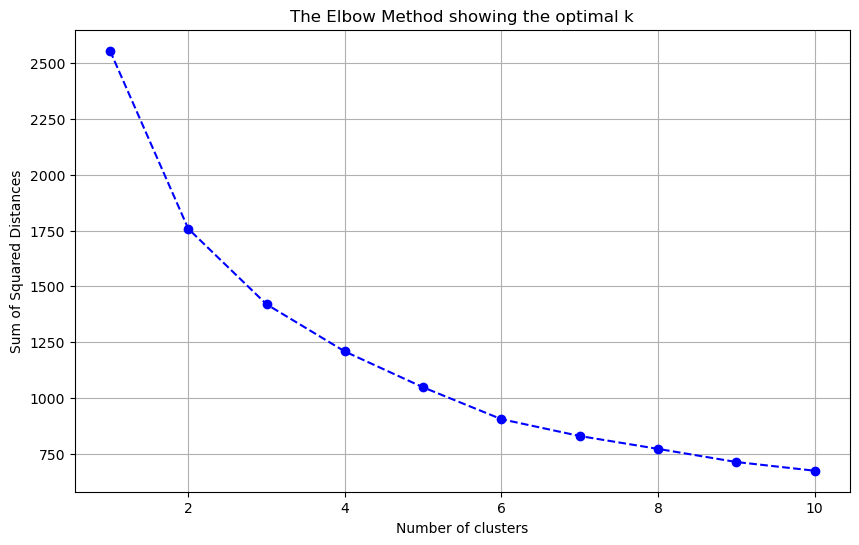

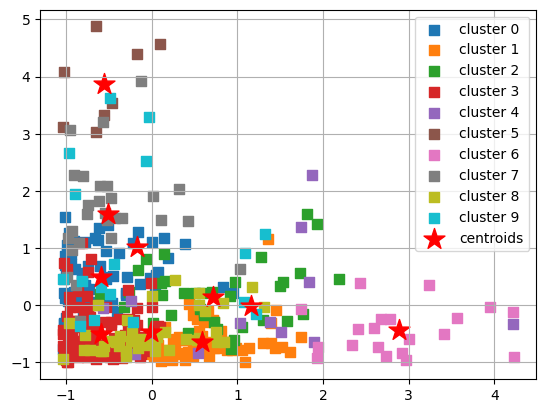

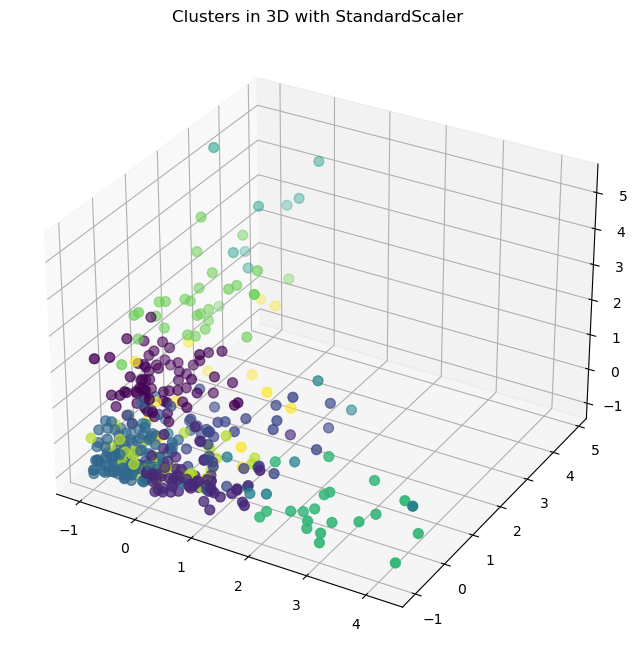

Inertia: 673.9431121407302


In [970]:
# StandardScaler without Log Transformation
# Standard Scaling
scaler = StandardScaler()
df_standard_scaled1 = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# Compute sum of squared distances for different k
ssd = []
for k in range(1,11):
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(df_standard_scaled1)
    ssd.append(kmeans1.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

# Set up the optimal value of k (number of clusters) is 4
optimal_clusters = 4
kmean1 = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km_standard1 = kmeans1.fit_predict(df_standard_scaled1)

# Plot clustering result
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(df_standard_scaled1, y_km_standard1, plt_cluster_centers=True)

# Plotting (Using the 3D plot as example)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_standard_scaled1[:, 0], df_standard_scaled1[:, 1], df_standard_scaled1[:, 2], c=y_km_standard1, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with StandardScaler")
plt.show()

# To print inertia:
print("Inertia:", kmeans1.inertia_)

From the plot above , the clusters are still overlapping. We change the scaling to use StandardScaler with Log Transformation

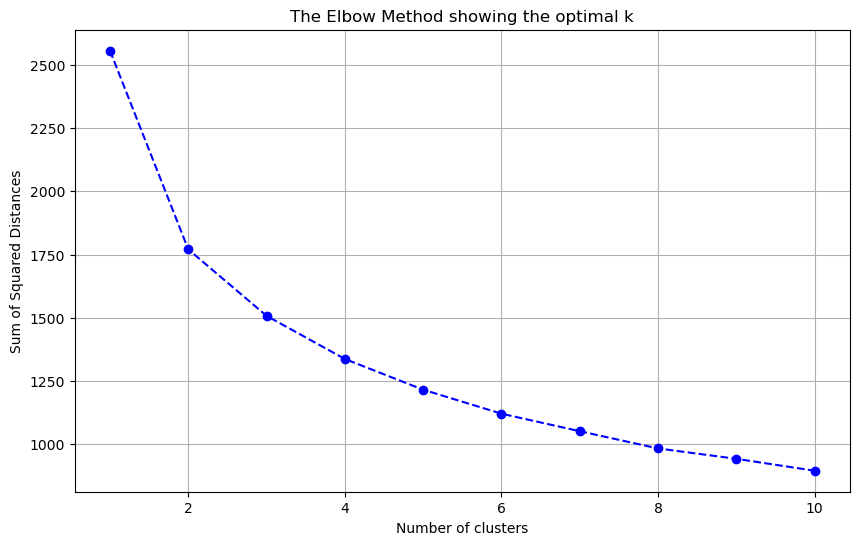

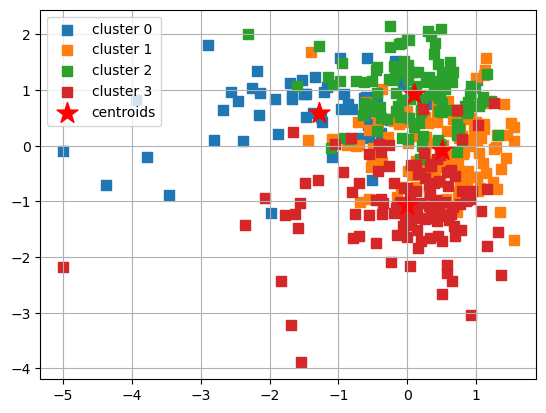

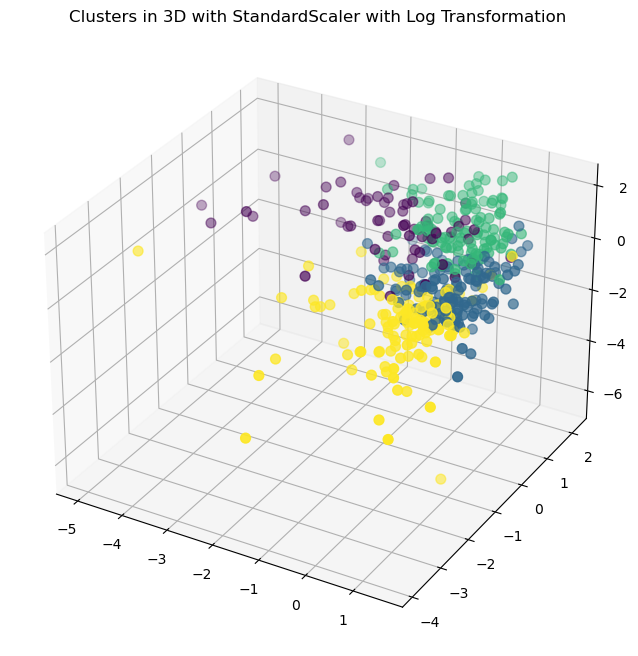

Inertia: 1337.061493731226


In [971]:
# Standard Scaling & StandardScaler with Log Transformation
scaler = StandardScaler()
dfx_pca_standard = scaler.fit_transform(df_transformed[continuous_features])


# Compute sum of squared distances for different k
ssd = []
for k in range(1, 11):
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(dfx_pca_standard)
    ssd.append(kmeans2.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

# Determine optimal number of clusters
optimal_clusters = 4

# KMeans Clustering
kmeans2 = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km_standard = kmeans2.fit_predict(dfx_pca_standard)

# 4. Plot clustering result
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(dfx_pca_standard, y_km_standard, plt_cluster_centers=True)

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx_pca_standard[:, 0], dfx_pca_standard[:, 1], dfx_pca_standard[:, 2], c=y_km_standard, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with StandardScaler with Log Transformation")
plt.show()

# To print inertia:
print("Inertia:", kmeans2.inertia_)

The clusters are still overlapping. We change the scaling to use StandardScaler with Log Transformation & PCA

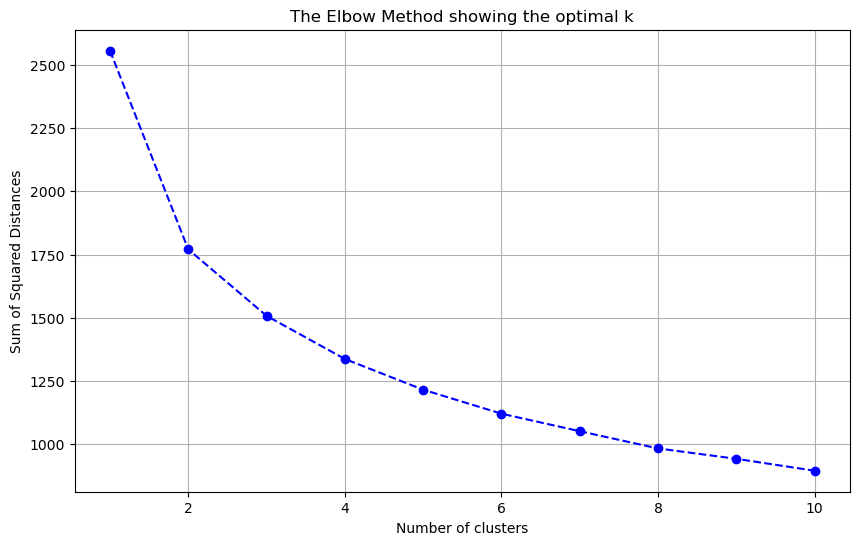

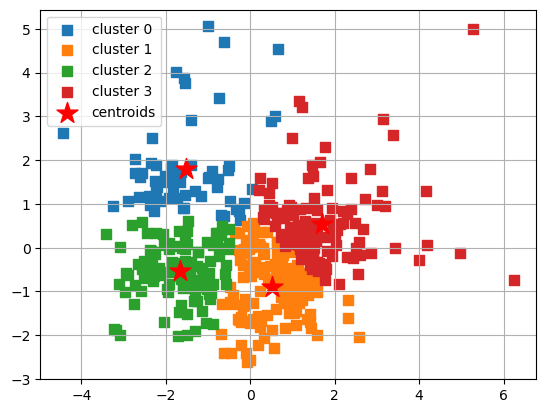

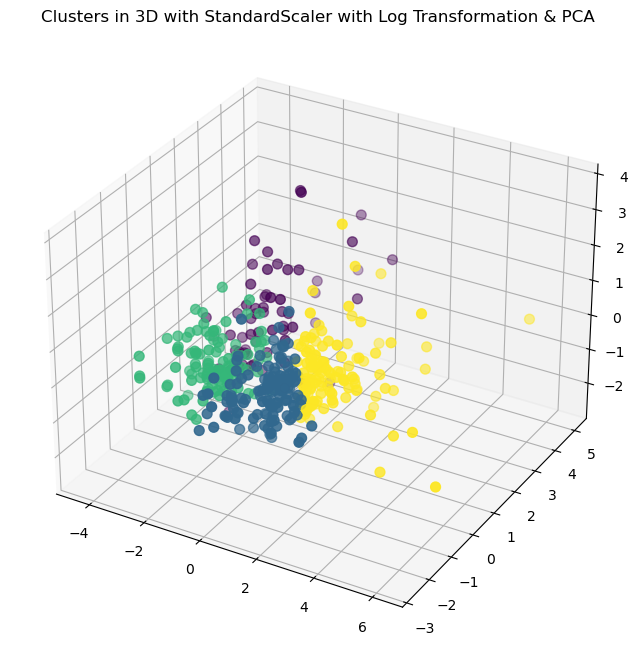

Inertia: 1337.0614937312262


In [972]:
# StandardScaler with Log Transformation & PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transformed[continuous_features])

# Apply PCA
pca = PCA(n_components=None)  # Use all components
dfx_pca_standard = pca.fit_transform(df_scaled)

# Compute sum of squared distances for different k
ssd = []
for k in range(1, 11):
    kmeans3 = KMeans(n_clusters=k, random_state=42)
    kmeans3.fit(dfx_pca_standard)
    ssd.append(kmeans3.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, 'bo-', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

# Determine optimal number of clusters
optimal_clusters = 4

# KMeans Clustering
kmeans3 = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km_standard = kmeans3.fit_predict(dfx_pca_standard)

# 4. Plot clustering result
def plot_clusters(X, y_res, plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

plot_clusters(dfx_pca_standard, y_km_standard, plt_cluster_centers=True)

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx_pca_standard[:, 0], dfx_pca_standard[:, 1], dfx_pca_standard[:, 2], c=y_km_standard, s=50, cmap='viridis')
ax.set_title("Clusters in 3D with StandardScaler with Log Transformation & PCA")
plt.show()

# To print inertia:
print("Inertia:", kmeans3.inertia_)

Analysis:

- Number of Clusters: Four distinct clusters are observed: blue, orange, green, and red

- Cluster Distribution:

    - Blue (Cluster 0): Positioned in the top-left, indicating a specific data pattern
    - Orange (Cluster 1): Dominates the right side, showing a distinct pattern
    - Green (Cluster 2): Found in the bottom-left, with clear separation from others
    - Red (Cluster 3): Central-left positioning with slight overlap with Cluster 0
    - Centroids: Marked with stars, representing the central point of each cluster

- Cluster Spread:

    - Clusters 0 & 3: Compact, suggesting strong data similarities
    - Cluster 1: Elongated distribution, hinting at potential sub-patterns
    - Cluster 2: Compact yet separate, indicating distinct characteristics
    - Overlaps: Minor overlap between Clusters 0 and 3, suggesting potential ambiguity or the need for additional data dimensions
    
- Conclusion: 
    - The clustering effectively segments the data by use StandardScaler with Log Transformation & PCA. The centroids aptly represent each cluster's core. Despite minor overlaps, the clusters capture data patterns well. This analysis provides a foundation for further study and decision-making

In [973]:
# Assign the cluster labels to a new variable
pred_cluster_labels_k = y_km_standard
print(pred_cluster_labels_k)

[2 2 2 1 1 2 2 2 2 2 2 3 2 2 2 3 0 1 2 2 2 3 1 2 0 3 3 2 1 2 1 3 1 3 0 1 2
 0 1 1 1 0 0 0 2 2 2 2 1 0 2 0 1 2 2 0 3 2 0 2 2 1 0 0 2 1 3 1 1 1 2 3 1 2
 3 1 3 0 2 1 0 3 1 3 1 2 0 0 0 3 3 3 2 2 2 1 1 3 0 2 0 0 1 2 1 1 3 3 3 1 1
 1 1 3 3 2 1 1 2 0 1 1 3 3 3 3 3 2 0 1 1 1 1 3 3 3 2 3 1 3 3 3 3 3 1 3 2 2
 1 2 0 2 3 1 2 2 2 2 0 3 3 0 2 0 0 3 0 1 1 1 1 2 0 0 3 3 0 2 0 3 3 3 0 3 1
 1 2 1 3 2 2 1 3 3 2 3 0 2 2 1 2 3 2 2 2 0 1 0 3 3 0 3 1 3 1 2 3 3 1 1 2 1
 0 1 0 3 1 3 1 1 1 3 2 2 2 1 3 1 1 3 2 1 2 2 3 1 1 1 1 1 3 3 1 0 2 2 1 2 3
 3 1 0 1 3 3 1 3 1 2 3 2 1 1 3 3 1 3 3 1 1 1 2 1 0 1 2 2 3 2 2 0 0 0 0 2 1
 3 2 1 1 0 3 1 2 3 2 3 2 3 1 3 1 1 3 3 1 1 1 2 1 1 2 3 1 3 1 0 2 0 0 3 0 2
 2 1 2 3 2 3 0 1 3 3 0 1 0 1 3 3 3 3 2 3 3 3 3 1 1 1 2 3 3 2 1 3 0 3 1 2 3
 2 3 1 1 3 3 3 3 3 1 3 3 2 3 3 3 3 1 3 0 1 3 1 2 2 1 1 1 0 1 1 2 2 2 0 1 0
 2 1 1 2 1 2 1 1 3 2 1 3 1 2 1 1 2 1 0]


In [974]:
# Add Cluster Assignments to the DataFrame
data['cluster_k'] = kmeans3.labels_

# Display the specified columns
outcome_df = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'cluster_k']]
outcome_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_k
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


In [975]:
# Cluster Analysis
outcome_df.groupby('cluster_k').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster_k,,,,,,,,
0,1.655738,2.639344,2809.049180,7061.836066,12349.327869,565.590164,5342.622951,635.836066
1,1.053030,2.469697,17400.787879,3644.780303,3885.348485,4869.166667,677.007576,1673.984848
2,1.792793,2.513514,9652.558559,9948.297297,13971.540541,1776.216216,5801.360360,1952.387387
3,1.008197,2.565574,9723.606557,1416.893443,2043.360656,2236.500000,332.967213,552.967213


In [976]:
# Count of Data Points in Each Cluster
outcome_df['cluster_k'].value_counts()


cluster_k
1    132
3    122
2    111
0     61
Name: count, dtype: int64

Cluster analysis:

- Cluster 0 (Luxury Grocery Shoppers): High spending on Milk, Grocery, and Detergents_Paper. Moderate spending on Fresh.
- Cluster 1 (Fresh Produce Enthusiasts): Predominantly purchases Fresh products, followed by Frozen goods. Also, spends moderately on Milk, Grocery.
- Cluster 2 (Grocery Bulk Buyers): Major purchases are made in the Grocery category, closely followed by Fresh and Milk. They also have a considerable purchase of Detergents_Paper.
- Cluster 3 (Budget Shoppers): Low spending across all categories except for Fresh, Frozen & Grocery

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

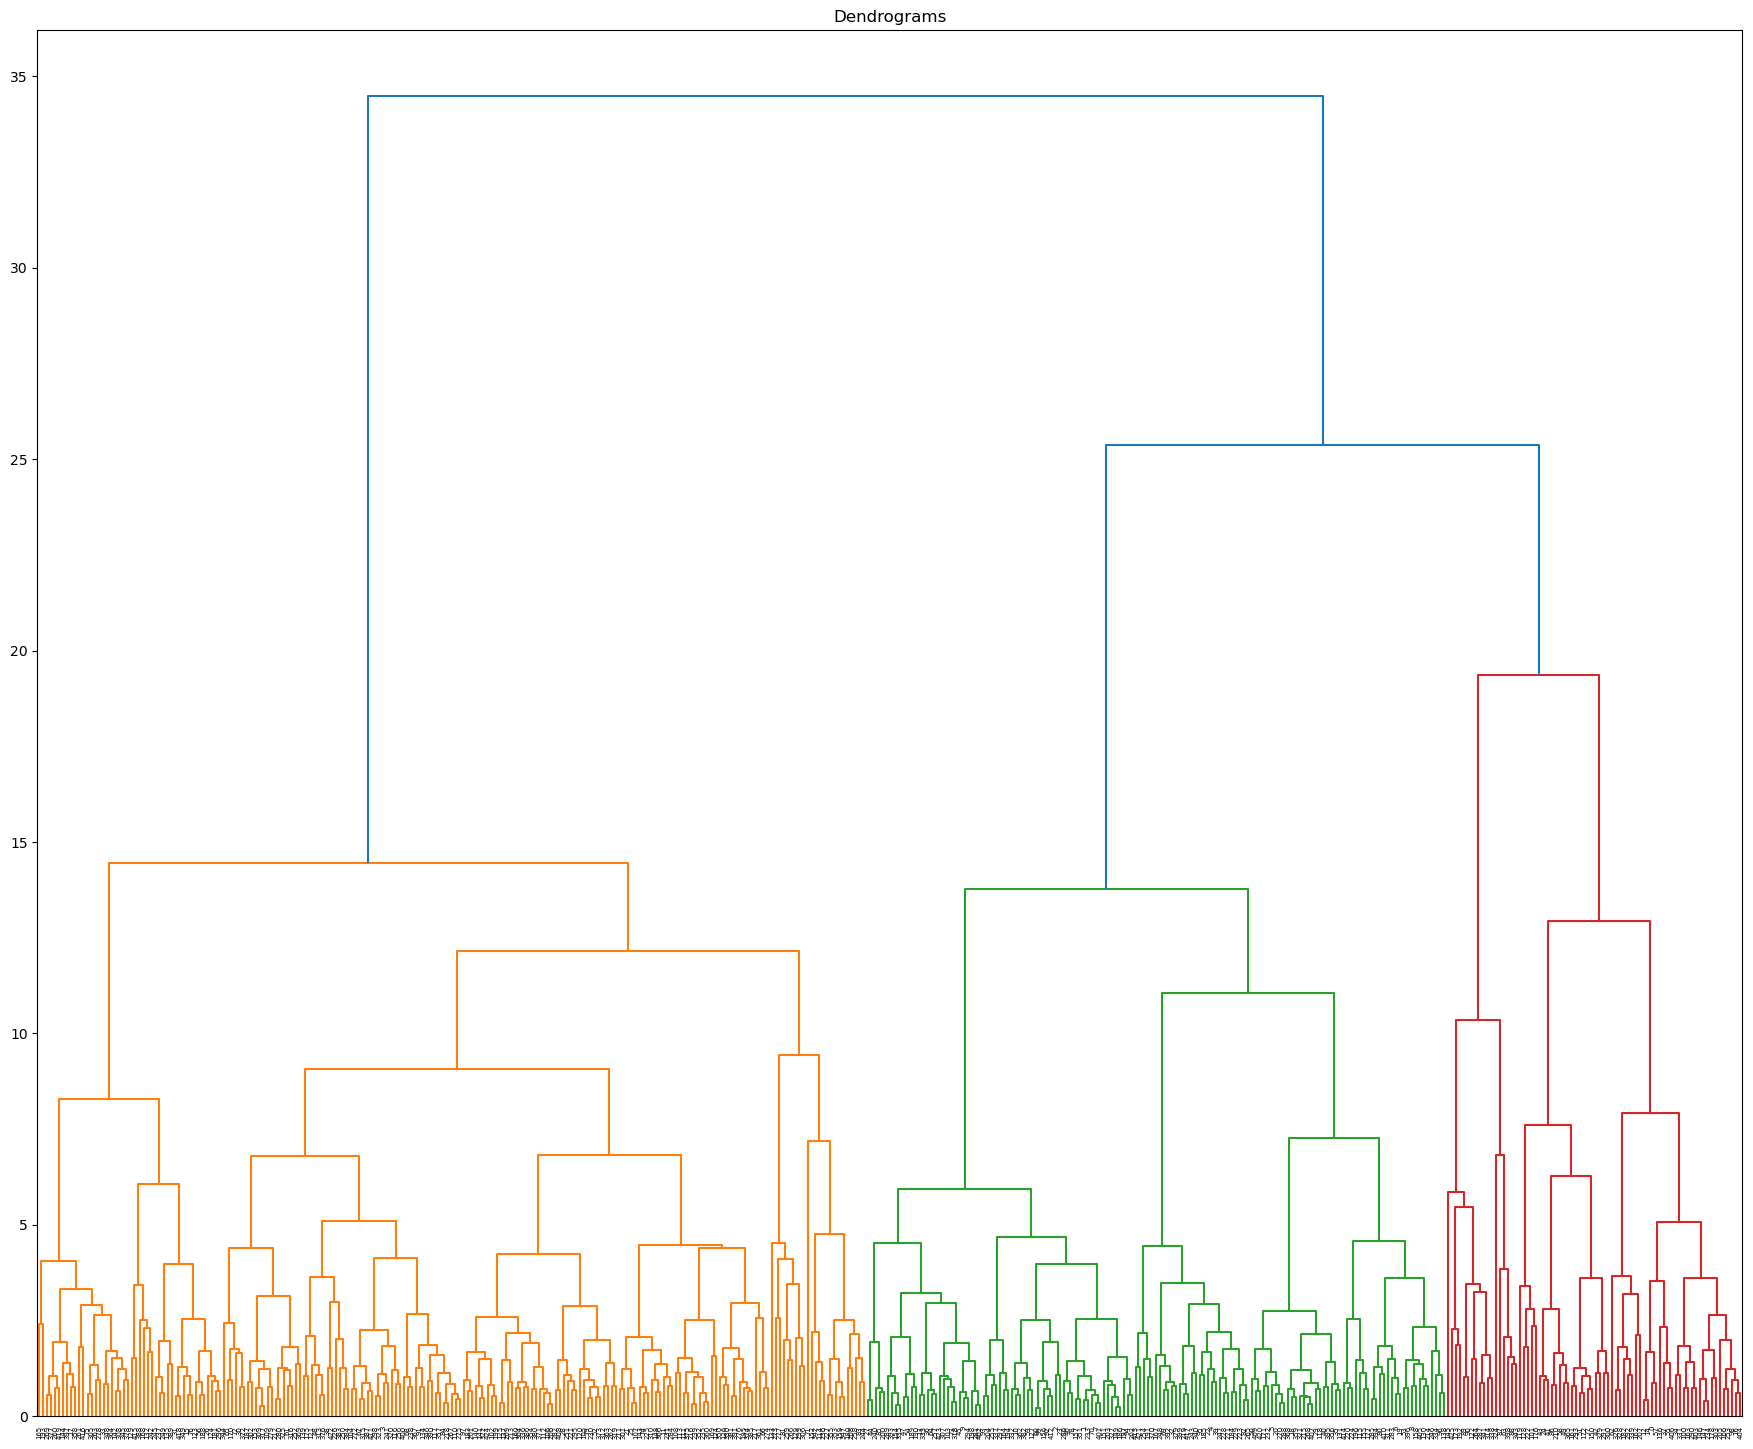

In [977]:
#Draw the dendrogram
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dfx_pca_standard, method='ward'))

The x-axis contains the samples and the y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and thus we can decide on a threshold of 25 and cut the dendrogram:

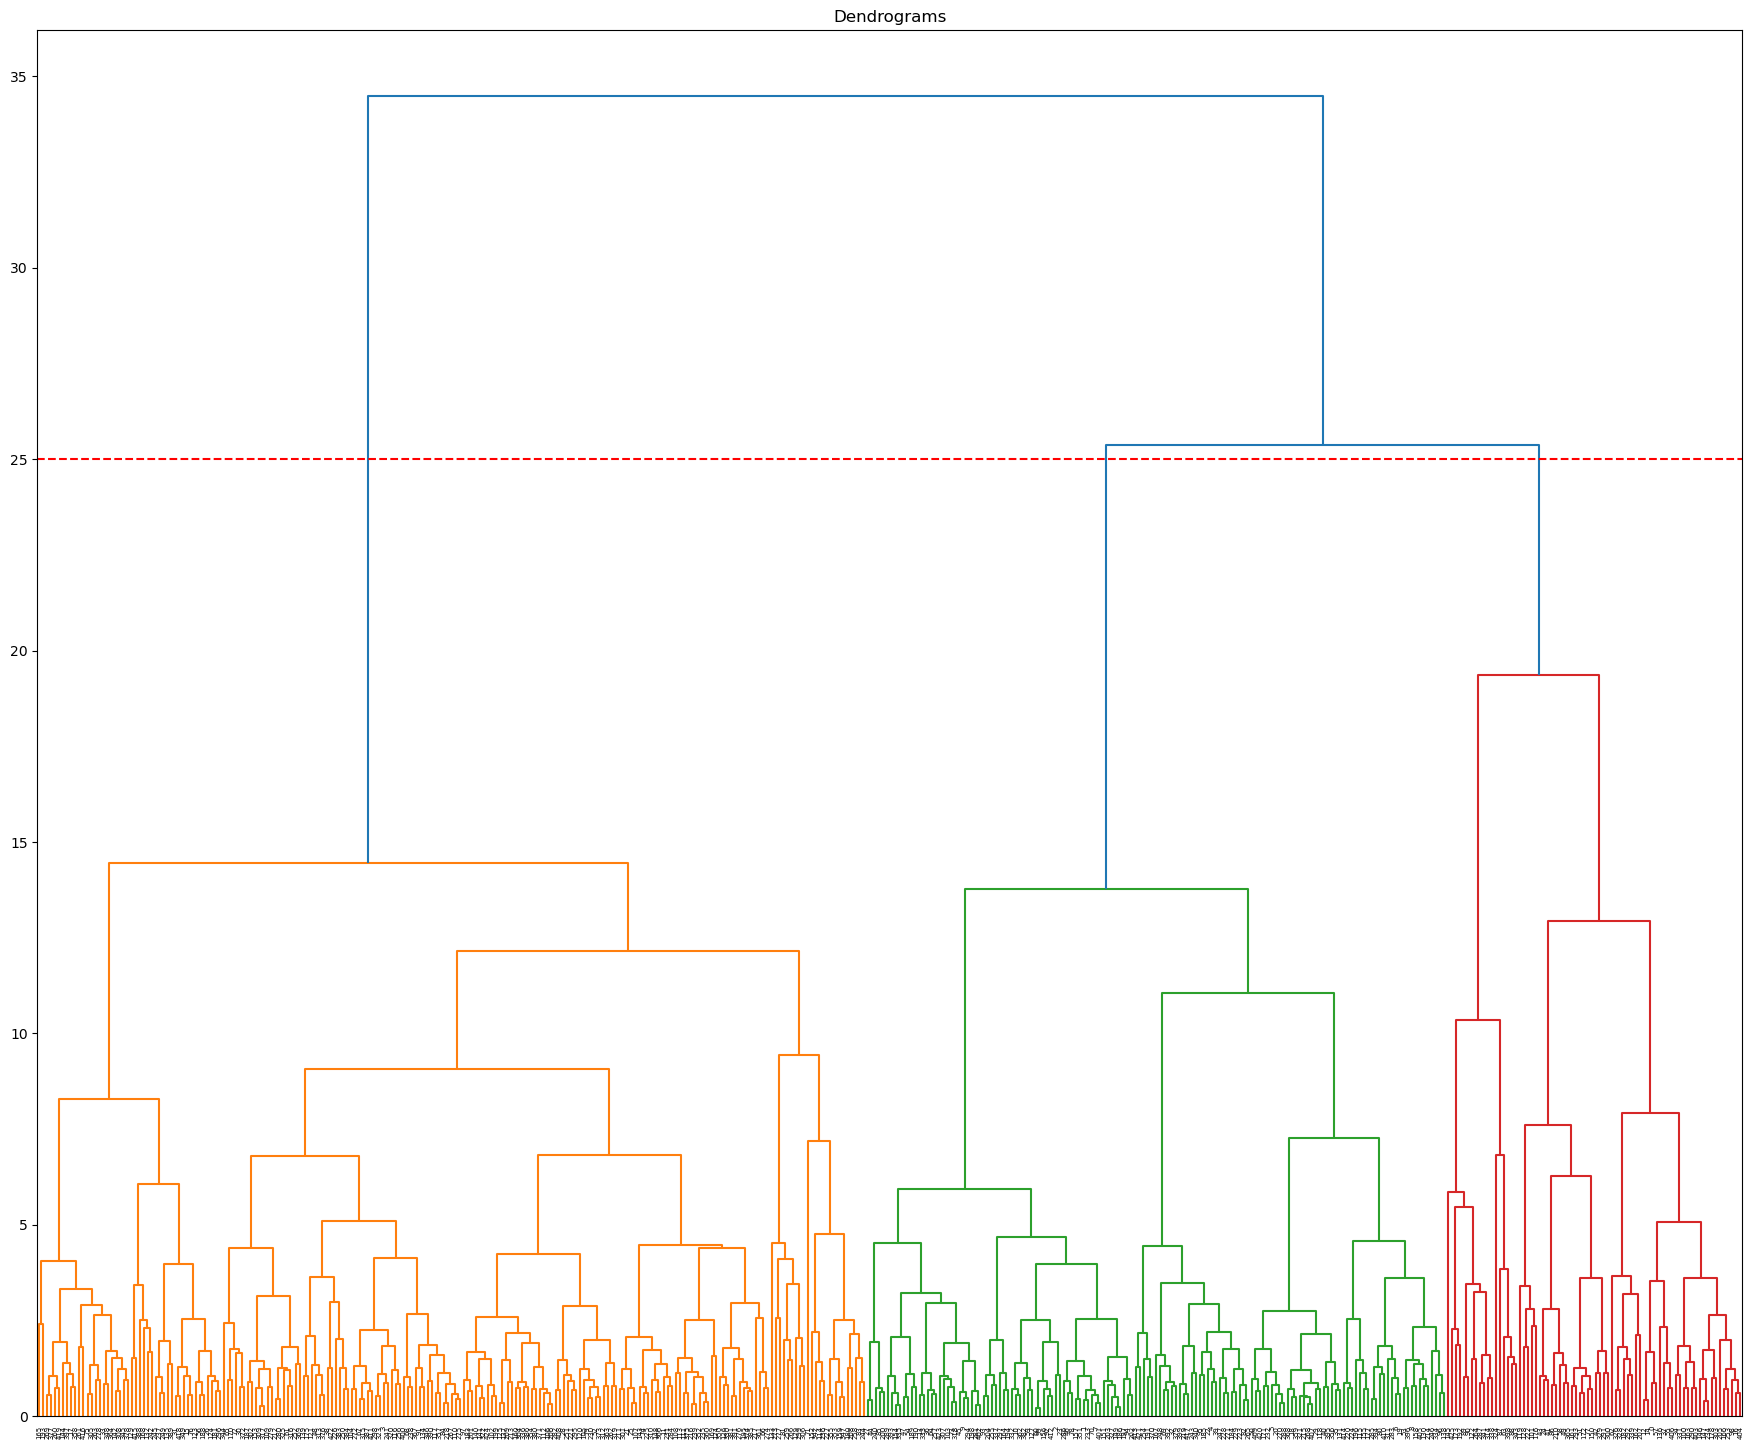

In [978]:
# Redraw the dendrogram with the cut-off line
plt.figure(figsize=(22, 18))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dfx_pca_standard, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

We have 3 clusters as this line cuts the dendrogram at two points. Now apply hierarchical clustering for 3 clusters

In [979]:
# Use AgglomerativeClustering with the distance threshold
distance_threshold = 25
hc = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=distance_threshold)
cluster_labels = hc.fit_predict(dfx_pca_standard)

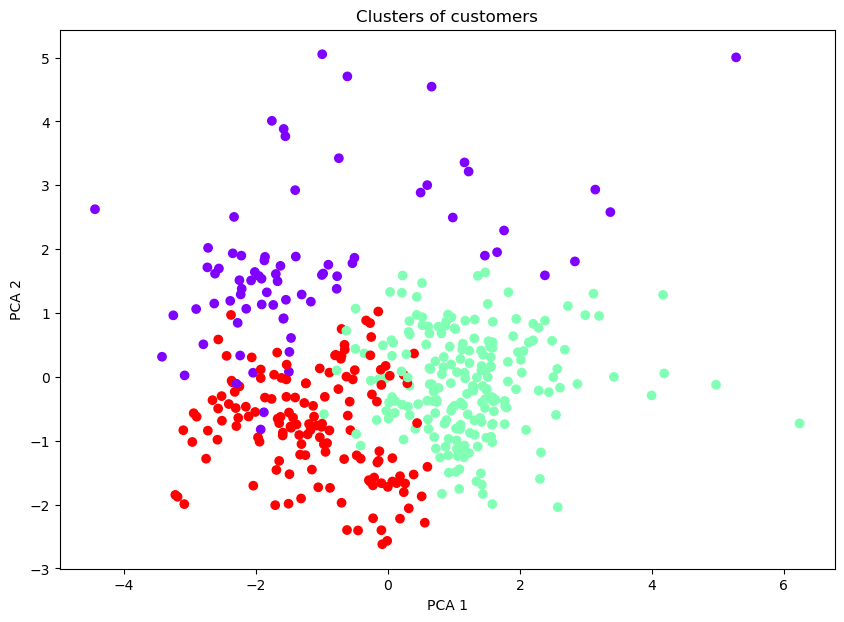

In [980]:
# Plotting the clusters on a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(dfx_pca_standard[:, 0], dfx_pca_standard[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [981]:
# Assign the cluster labels to a new variable
pred_cluster_labels_h = cluster_labels
print(cluster_labels)

[0 2 2 1 2 2 2 2 2 2 2 1 0 2 0 1 0 1 2 2 2 1 2 2 0 1 1 2 1 2 1 1 2 1 0 2 2
 0 1 2 2 0 0 0 2 2 2 2 1 0 2 0 1 2 2 0 1 0 0 2 2 1 0 0 2 1 1 1 1 2 2 1 1 2
 1 1 1 0 2 1 2 1 2 1 1 2 0 0 0 0 0 1 2 2 2 2 2 1 0 2 0 0 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 0 1 1 0 1 1 1 1 2 0 1 2 2 1 1 1 1 0 1 2 1 1 1 1 1 1 0 0 0
 1 2 0 2 1 1 2 2 2 2 2 1 1 0 0 0 2 1 0 2 1 1 1 2 0 0 1 1 0 2 0 1 1 1 0 1 2
 2 2 1 1 2 2 2 0 1 2 1 2 2 2 1 2 1 2 2 2 0 1 0 1 1 0 1 1 1 2 2 1 1 1 2 2 1
 0 2 2 1 1 1 2 2 1 1 2 2 0 1 1 1 1 1 2 1 1 2 1 1 2 2 2 1 1 1 1 0 2 2 1 2 1
 1 1 1 1 1 0 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 0 2 2 0 0 0 0 2 1
 1 2 1 1 0 1 1 0 1 1 1 2 1 1 1 2 1 1 0 1 1 1 2 1 1 2 1 1 0 1 0 2 0 0 1 0 2
 2 2 2 1 2 0 0 2 0 1 0 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 0 1 1 2 1
 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 0 2 1 2 2 0 0 2 0
 2 1 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 1 0]


In [982]:
# Add Cluster Assignments to the DataFrame
data['cluster_h'] = pred_cluster_labels_h

# Display the specified columns
outcome_df = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'cluster_h']]
outcome_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_h
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,1


In [983]:
# Cluster Analysis
outcome_df.groupby('cluster_h').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster_h,,,,,,,,
0,1.608108,2.689189,3198.351351,6746.797297,11912.540541,683.810811,5045.878378,925.094595
1,1.014493,2.507246,12429.188406,2334.256039,2719.898551,3093.144928,406.371981,979.521739
2,1.606897,2.489655,13216.896552,8321.041379,11184.544828,3147.317241,4429.820690,1880.765517


In [984]:
# Count of Data Points in Each Cluster
outcome_df['cluster_h'].value_counts()

cluster_h
1    207
2    145
0     74
Name: count, dtype: int64

In [985]:
# Group by the cluster label and get descriptive statistics
cluster_stats = data.groupby('cluster_h').describe()

cluster_stats

Channel                                              Region  \
            count      mean       std  min  25%  50%  75%  max  count   
cluster_h                                                               
0            74.0  1.608108  0.491505  1.0  1.0  2.0  2.0  2.0   74.0   
1           207.0  1.014493  0.119800  1.0  1.0  1.0  1.0  2.0  207.0   
2           145.0  1.606897  0.490133  1.0  1.0  2.0  2.0  2.0  145.0   

                     ... Delicassen         cluster_k                      \
               mean  ...        75%     max     count      mean       std   
cluster_h            ...                                                    
0          2.689189  ...     1316.5  6372.0      74.0  0.743243  1.182762   
1          2.507246  ...     1297.0  4829.0     207.0  2.072464  1.014251   
2          2.489655  ...     2498.0  7844.0     145.0  1.627586  0.564516   

                                    
           min  25%  50%  75%  max  
cluster_h                           
0          0.0  0.0  0.0  2.0  3.0  
1          0.0  1.0  3.0  3.0  3.0  
2          0.0  1.0  2.0  2.0  2.0  

[3 rows x 72 columns]

Cluster analysis:
- Cluster 0:  Given their high spending on Milk, Grocery, and Detergents_Paper but lower spending on Detergents_Paper and frozen products, this cluster likely represents stores that don't focus on perishable items. These could be smaller supermarkets or convenience stores.
- Cluster 1: Given their high spending on Fresh items and low spending on Delicassen and Detergents_Paper, these are likely establishments that need a lot of fresh produce. This points towards restaurants, cafes, or fresh markets.
- Cluster 2: This cluster has a diversified spending pattern, leaning more towards Fresh, Milk, and Grocery items, but also has a significant spend on Delicassen. This could represent larger supermarkets or hypermarkets which have a broad range of items, including specialty or delicacy items.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Plot the explained variance ratio

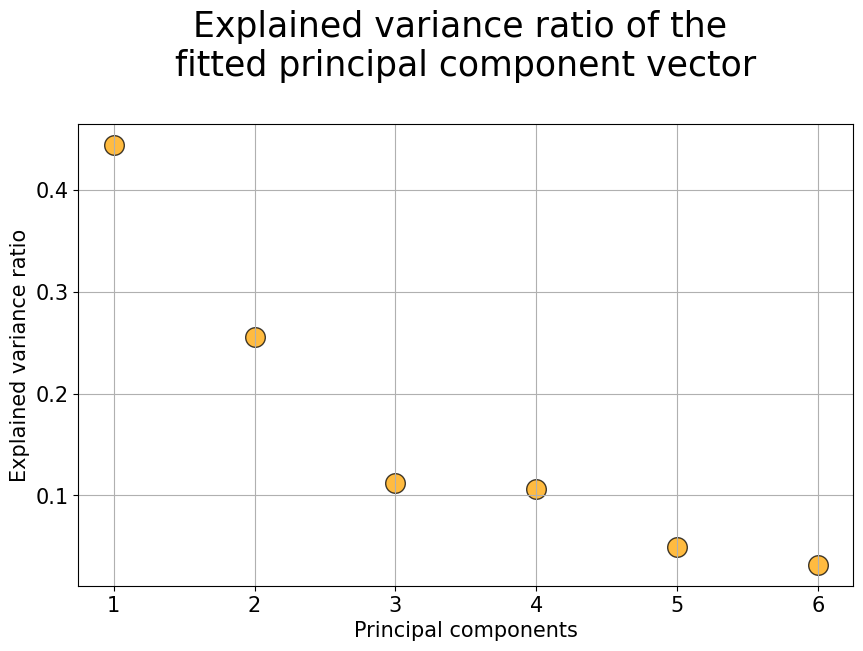

In [986]:
pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx_pca_standard)
dfx_pca

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [987]:
pca.explained_variance_ratio_

array([0.44445998, 0.25597022, 0.11180659, 0.10634184, 0.04954732,
       0.03187405])

Analysis:
- First Principal Component: The first component explains the highest variance in the dataset, a little below 0.44

- Second Principal Component: This component explains a variance slightly below 0.25
- Subsequent Components: The variance explained by the third, fourth, fifth, and sixth components decreases progressively and is notably lower than the first two components
- From the graph, it looks like the first two components capture the majority of the variance in the data, with the third and subsequent components adding less and less explanatory value.

In [988]:
# Displaying loadings for each principal component
components_df = pd.DataFrame(data=pca.components_,
                             index=[f'PC{i+1}' for i in range(len(dfx_pca.explained_variance_ratio_))])
print(components_df)

       0             1             2             3             4             5
PC1  1.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
PC2 -0.0  1.000000e+00  6.661338e-16  2.220446e-16  5.551115e-17  0.000000e+00
PC3  0.0 -5.551115e-16  1.000000e+00 -5.051515e-15  3.608225e-16  5.551115e-17
PC4 -0.0 -3.330669e-16  4.996004e-15  1.000000e+00  2.498002e-16  4.440892e-16
PC5 -0.0 -2.220446e-16 -1.387779e-16 -2.220446e-16  1.000000e+00  1.124101e-15
PC6 -0.0  5.551115e-17 -1.110223e-16 -4.440892e-16 -1.554312e-15  1.000000e+00


Analysis PC1 for example:

Feature 0 (the first feature) has a loading of 0.173684.
Feature 1 has a loading of -0.532116.
Feature 2 has a loading of -0.565466.
Feature 3 has a loading of 0.195311.
Feature 4 has a loading of -0.547850.
Feature 5 has a loading of -0.169260.
These values show how much each feature contributes to PC1. Positive values indicate a positive relationship, and negative values indicate a negative relationship. The magnitude of the values indicates the strength of the relationship.

In [992]:
# Apply PCA again with n_components=2
pca2 = PCA(n_components=2)
dfx_pca_standard_pca = pca2.fit_transform(dfx_pca_standard)

# Get the transformed dataset
dfx_pca_standard_pca = pd.DataFrame(dfx_pca_standard_pca)
dfx_pca_standard_pca.head()

,0,1
0,-1.501437,0.079337
1,-1.477528,-0.778061
2,-1.492805,-1.524241
3,0.913446,-1.228648
4,-0.703298,-1.972313


In [993]:
# View the number of columns and rows of the transformed data dfx_pca_standard_pca
dfx_pca_standard_pca.shape

(426, 2)

In [1006]:
original_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] 

components = pd.DataFrame(pca2.components_, columns=original_columns, index=['PC-1', 'PC-2'])
print(components)

      Fresh  Milk       Grocery        Frozen  Detergents_Paper  Delicassen
PC-1    1.0   0.0  0.000000e+00  0.000000e+00      0.000000e+00         0.0
PC-2   -0.0   1.0  6.661338e-16  2.220446e-16      5.551115e-17         0.0


- For PC-1,it has a value of 1.0 for "Fresh" and 0.0 for all other features. This means that PC-1 is essentially the same as the "Fresh" feature, with no contribution from other features
- For PC-2, it has a value of 1.0 for "Milk" and very small values (close to zero) for all other features. This means that PC-2 is essentially the same as the "Milk" feature, with very little contribution from other features.

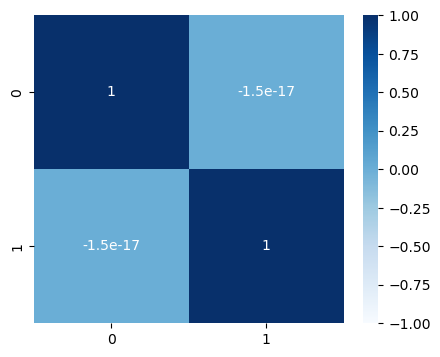

In [1007]:
# Use a correlation matrix heatmap to check the relationship between the different variables in the PCA transformed
plt.figure(figsize=(5, 4))
heatmap_pca = sns.heatmap(dfx_pca_standard_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

The corresponding values of the two datasets are completely different. Check mean and Std

In [1008]:
means = dfx_pca_standard.mean()
std_devs = dfx_pca_standard.std()

print("Means:")
print(means)

print("\nStandard Deviations:")
print(std_devs)

Means:
4.169851735681339e-18

Standard Deviations:
1.0


The mean is very close to 0 (4.169851735681339e-18 is essentially negligible and can be considered as zero for all practical purposes).
The standard deviation is 1.
This confirms that each feature in the dataset has a mean of approximately 0 and a standard deviation of 1, which is the desired outcome for standardization.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. EDA: 
    - The data does not follow a normal distribution.
    - Some features exhibit high correlation:
        - Detergents_Paper & Grocery: 0.89
        - Grocery & Milk: 0.77
        - Detergents_Paper & Milk: 0.70
    - Some features have low correlation:
        - Frozen & Grocery: -0.16
        - Milk & Fresh: -0.14
        - Frozen & Milk: -0.05    
    - Features with the highest importance specific to Principal Component Analysis (PCA) are: Grocery, Milk, Detergents_Paper.
2. KMeans Clustering:
    - The data can be effectively separated into 4 clusters.
    - Using log transformation, standard scaling & PCA improves clustering results with this data. 
    - Cluster analysis:

        - Cluster 0 (Luxury Grocery Shoppers): High spending on Milk, Grocery, and Detergents_Paper. Moderate spending on Fresh.
        - Cluster 1 (Fresh Produce Enthusiasts): Predominantly purchases Fresh products, followed by Frozen goods. Also, spends moderately on Milk, Grocery.
        - Cluster 2 (Grocery Bulk Buyers): Major purchases are made in the Grocery category, closely followed by Fresh and Milk. They also have a considerable purchase of Detergents_Paper.
        - Cluster 3 (Budget Shoppers): Low spending across all categories except for Fresh, Frozen & Grocery
3. Hierarchical Clustering :
    - The data can be separated into 3 clusters effectively using hierarchical clustering. 
    - Cluster analysis:
        - Cluster 0:  Given their high spending on Milk, Grocery, and Detergents_Paper but lower spending on Detergents_Paper and frozen products, this cluster likely represents stores that don't focus on perishable items. These could be smaller supermarkets or convenience stores.
        - Cluster 1: Given their high spending on Fresh items and low spending on Delicassen and Detergents_Paper, these are likely establishments that need a lot of fresh produce. This points towards restaurants, cafes, or fresh markets.
        - Cluster 2: This cluster has a diversified spending pattern, leaning more towards Fresh, Milk, and Grocery items, but also has a significant spend on Delicassen. This could represent larger supermarkets or hypermarkets which have a broad range of items, including specialty or delicacy items.
4. PCA:
    - PC1 captures 44.4% of the variance in the data
    - PC2 captures 25.6%
    - PC3 captures 11.1%
    - PC4 captures 10.6%
    - PC5 captures 4.9%
    - PC6 captures the remaining 3.1%.
